In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
dataset = pd.read_csv(r'C:\Users\birth\Algerian Forest Fire Project\Algerian_forest_fires_dataset_CLEANED.csv')

In [3]:
dataset

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
239   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
240   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
241   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
242   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
243   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI   Classes  Region  
0    0.5  not fire       1  
1    0.4  not fire       1  
2    0.1  not fire       1  
3    0.0  not fire       1  
4    0.5  not fire       1  
..   ...       ...     ...  
239  6.5      fire       2  
240  0.0  not fire       2  
241  0.2  not fire       2  
242  0.7  not fire       2  
243  0.5  not fire       2  

[244 rows x 15 columns]

# VISUALIZATION

#To visualize data we will have to drop date month and year column as their visualization would not be of much help

In [4]:
dataset_1= dataset.drop(['day','month','year'], axis= 1)

# Encoding Not fire as 0 and Fire as 1

In [5]:
dataset_1['Classes']= np.where(dataset['Classes']== 'not fire', 0,1)

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

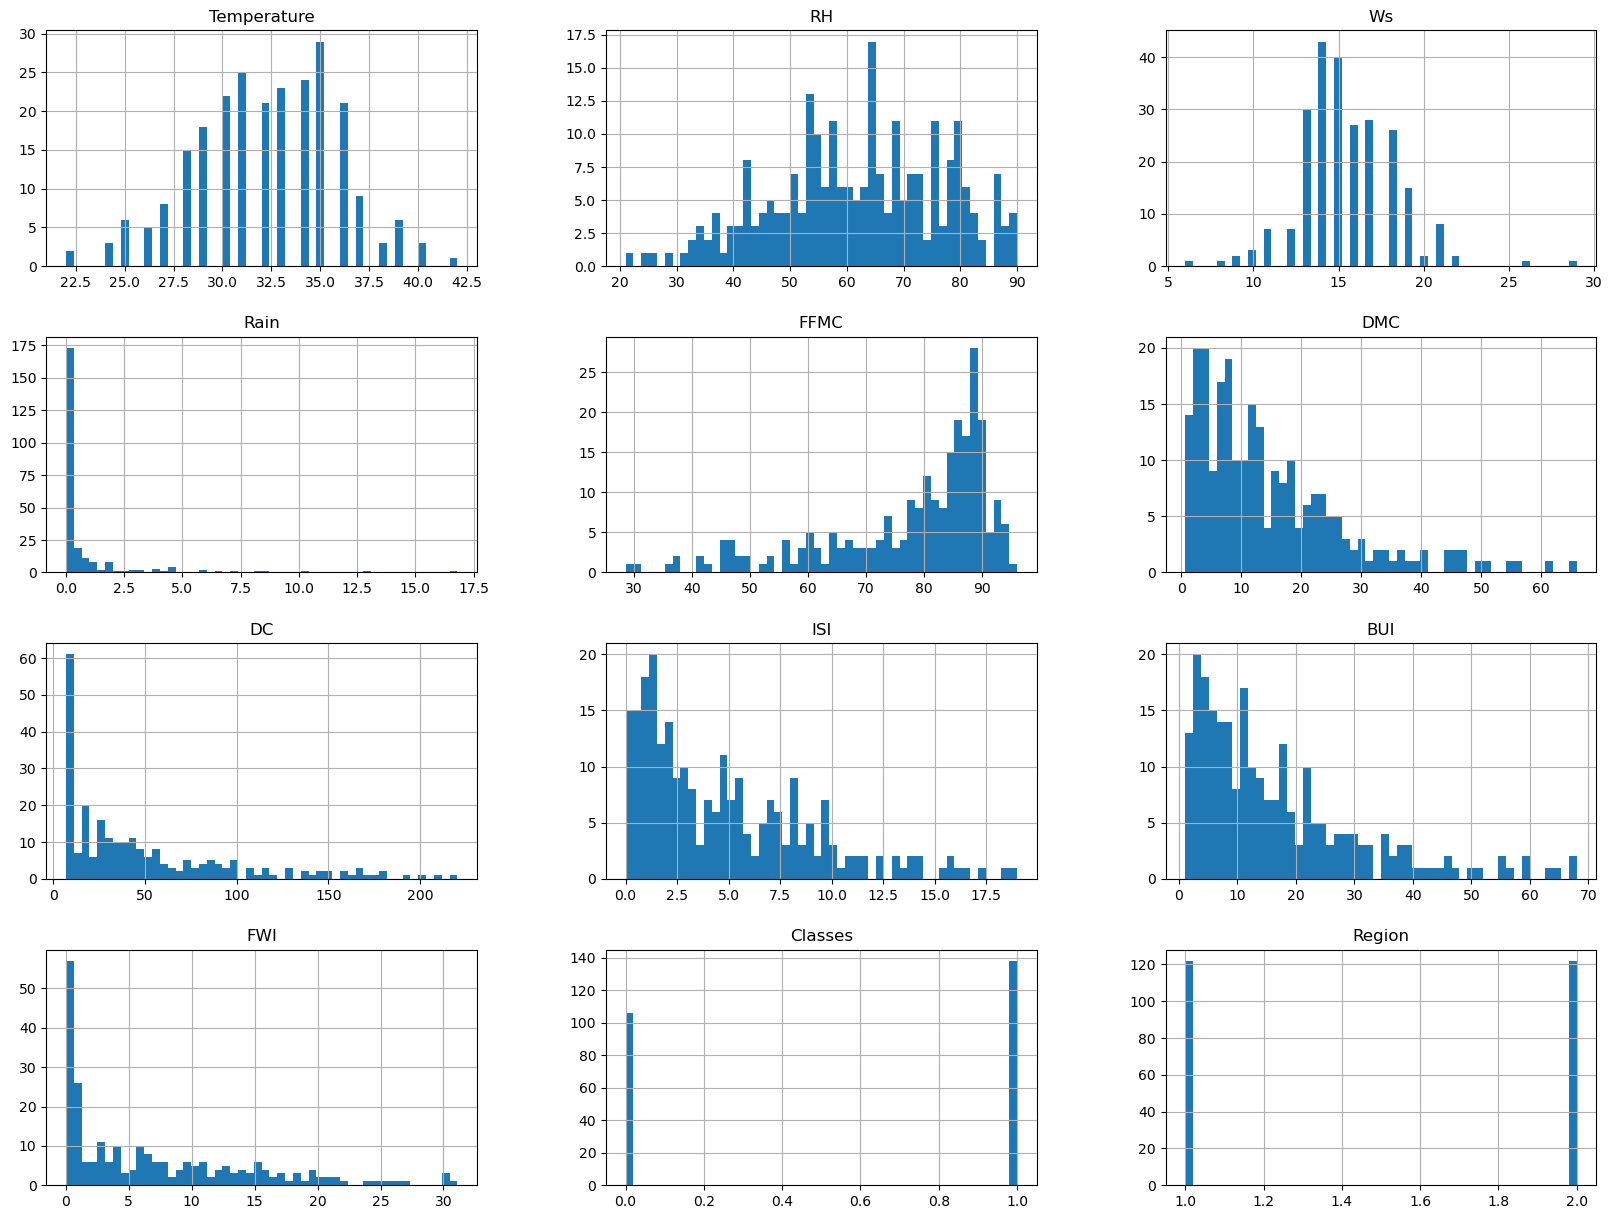

In [6]:
# PLot histogram for all features

dataset_1.hist(bins=50, figsize=(20,15))

In [7]:
def chart(feature):
    plt.style.use("default")
    plt.figure(figsize=[14,8])
    by_feature_1 =  dataset_1.groupby([feature], as_index=False)['Classes'].sum()
    ax= sns.barplot(x= feature, y = 'Classes', data = by_feature_1)
    ax.set(title = str(feature) +" " + 'VS Fire Count')
    plt.ylabel('Fire Count')
    

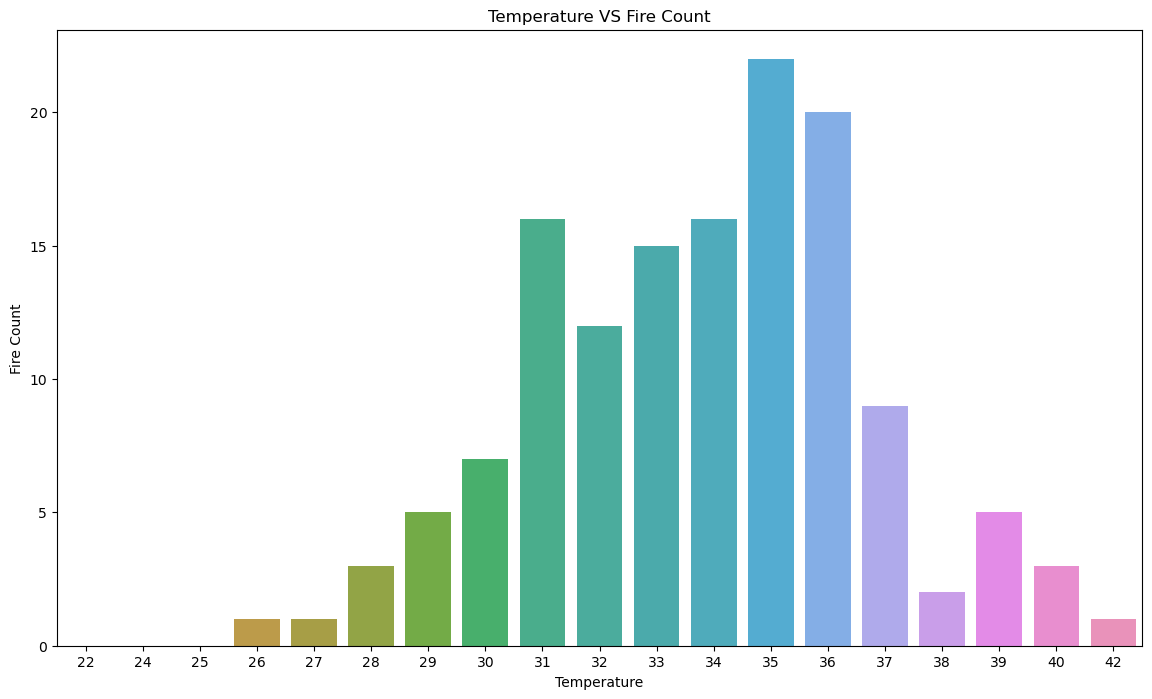

In [8]:
chart('Temperature')

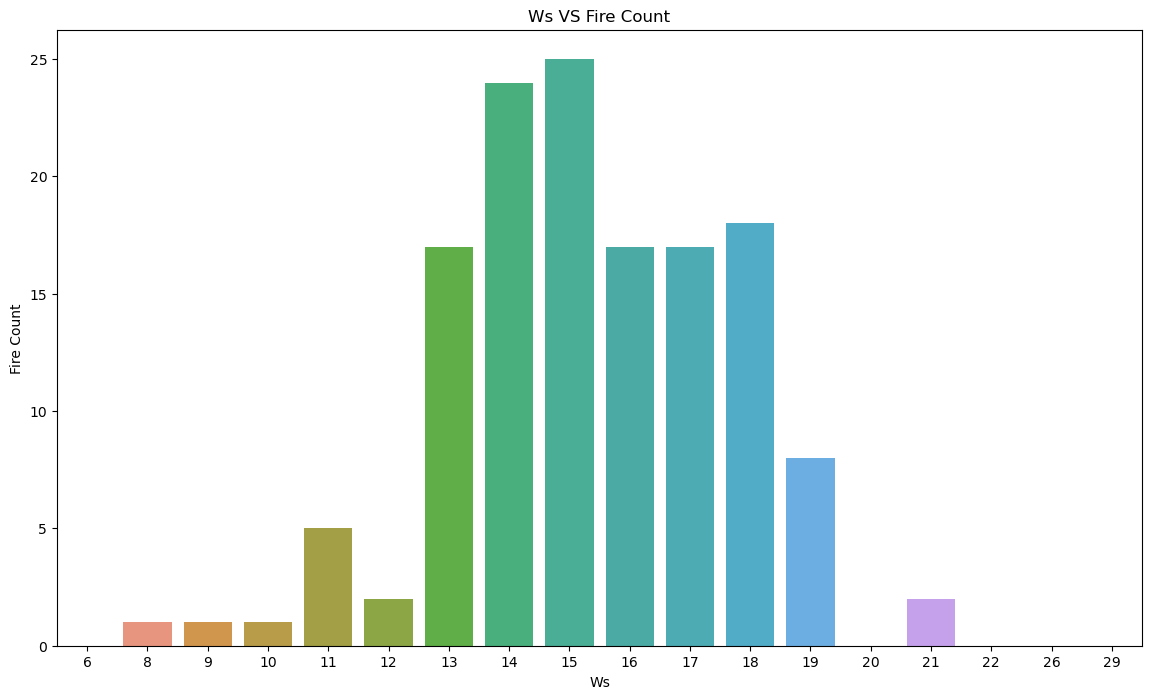

In [9]:
chart('Ws')

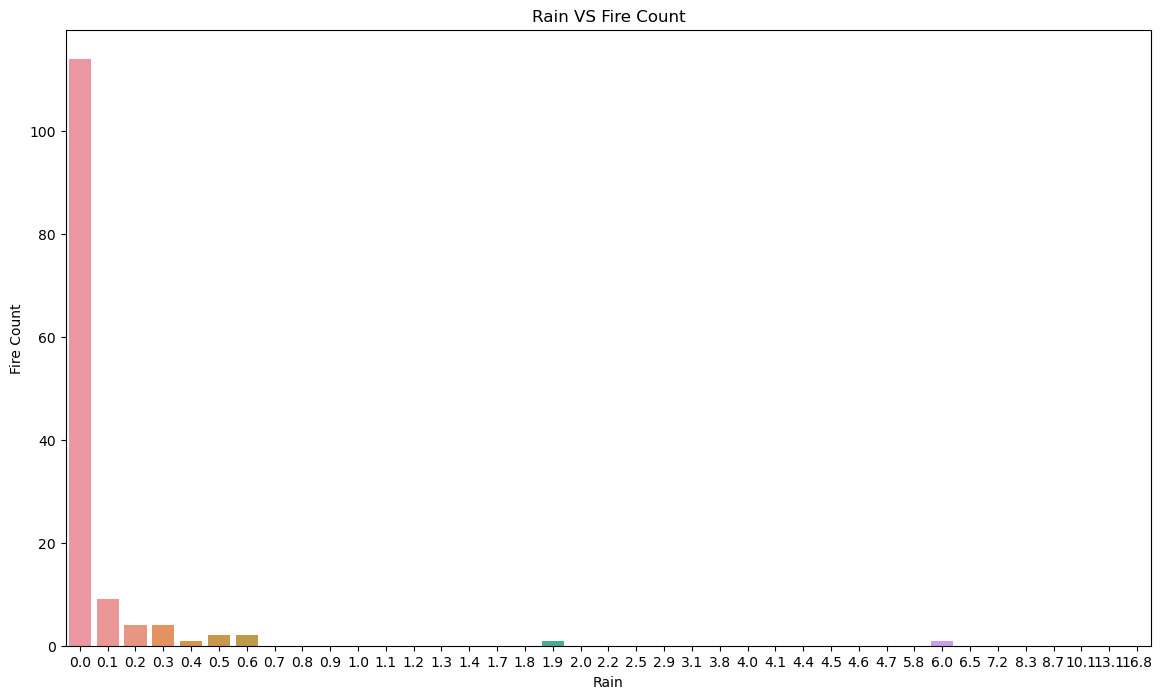

In [10]:
chart('Rain')

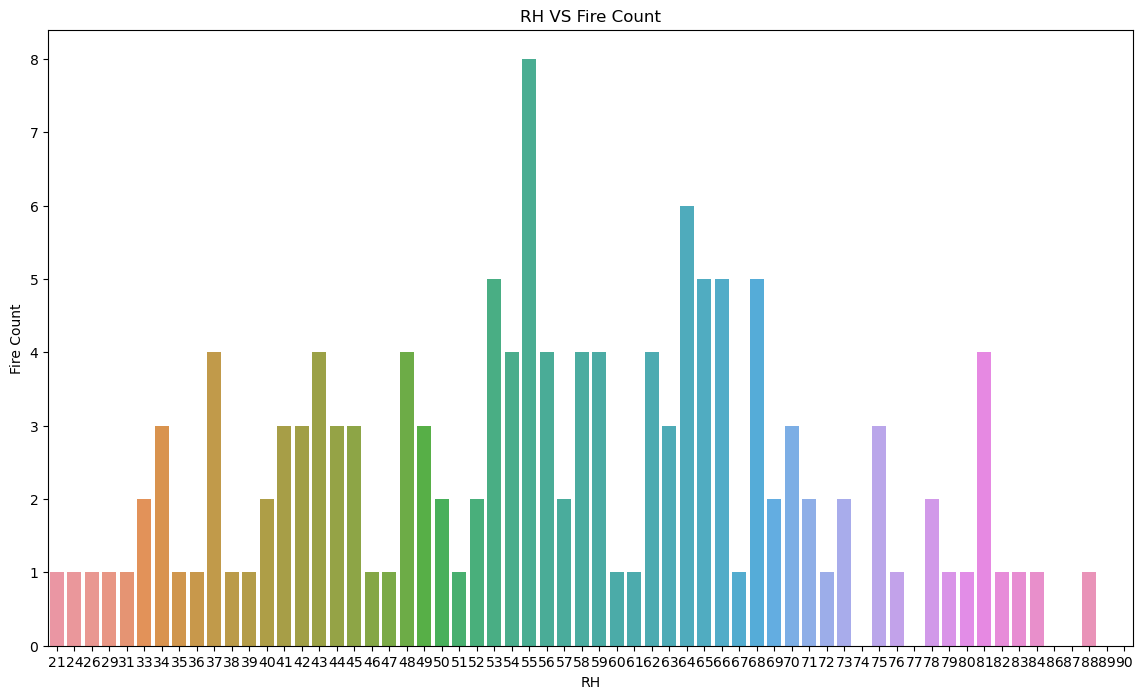

In [11]:
chart('RH')

# TO Visualize outliers we will draw boxplot

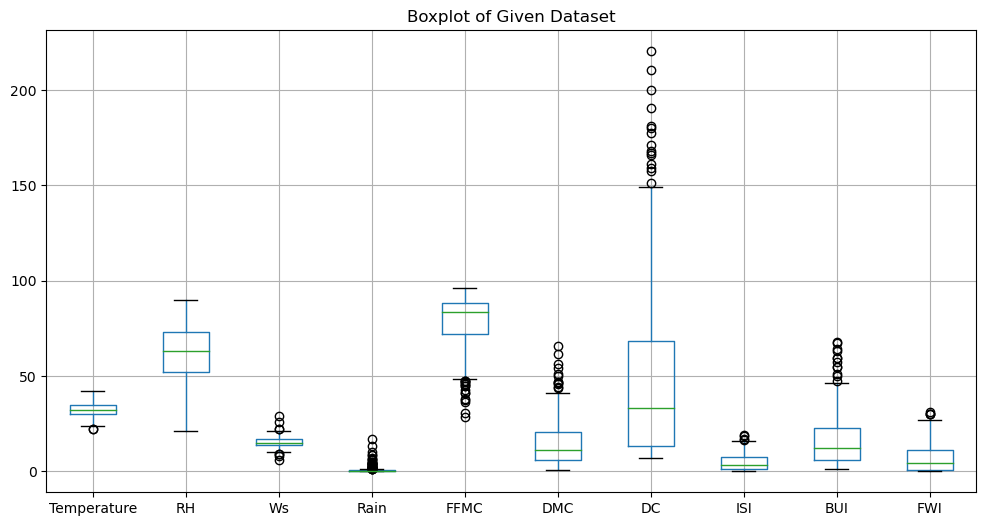

In [12]:
dftemp = dataset_1.drop(['Classes', 'Region'], axis=1)
fig = plt.figure(figsize =(12, 6))
ax = dftemp.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

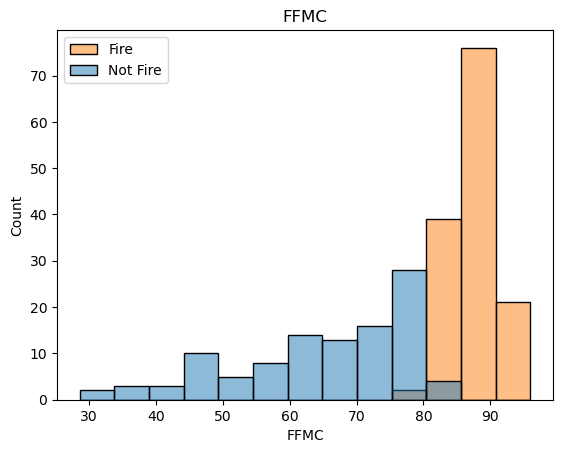

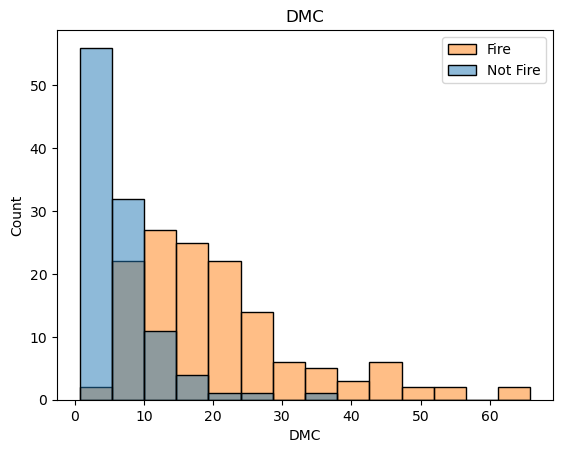

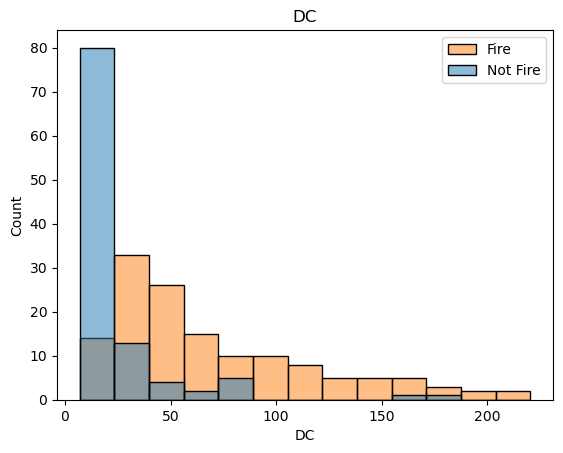

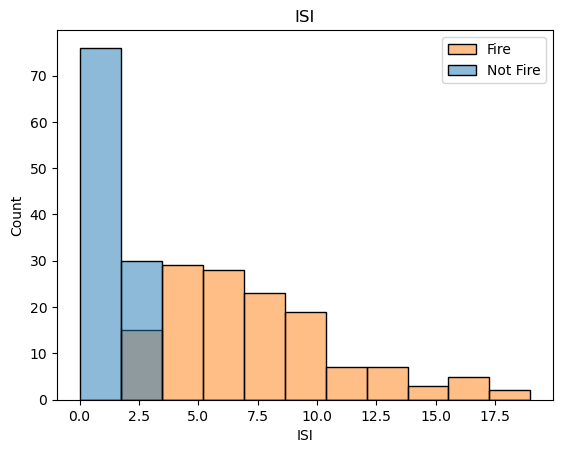

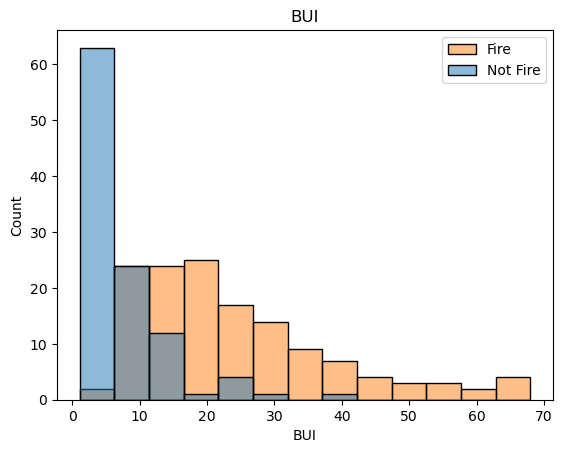

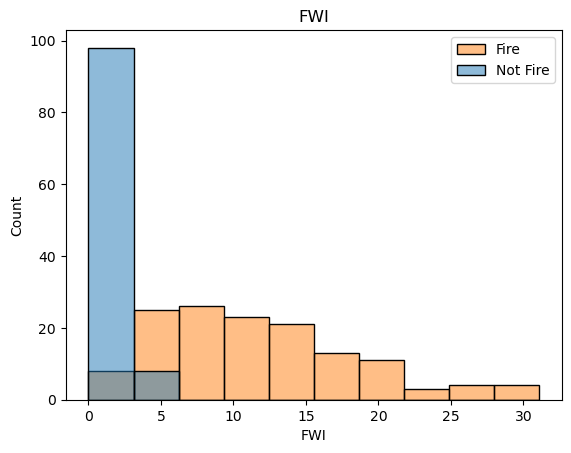

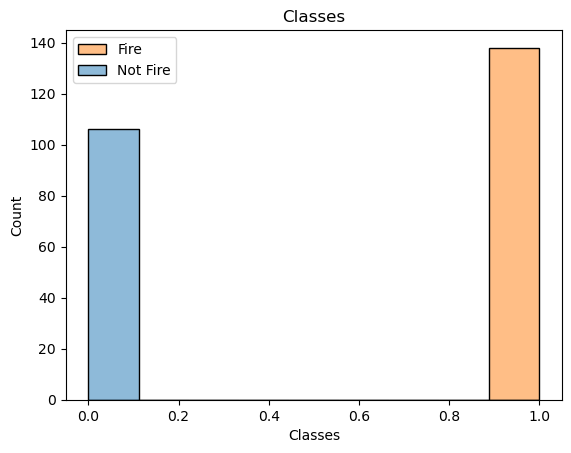

In [13]:
dftemp = dataset_1.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

# To compare correlation between features we will draw heatmap

<Axes: >

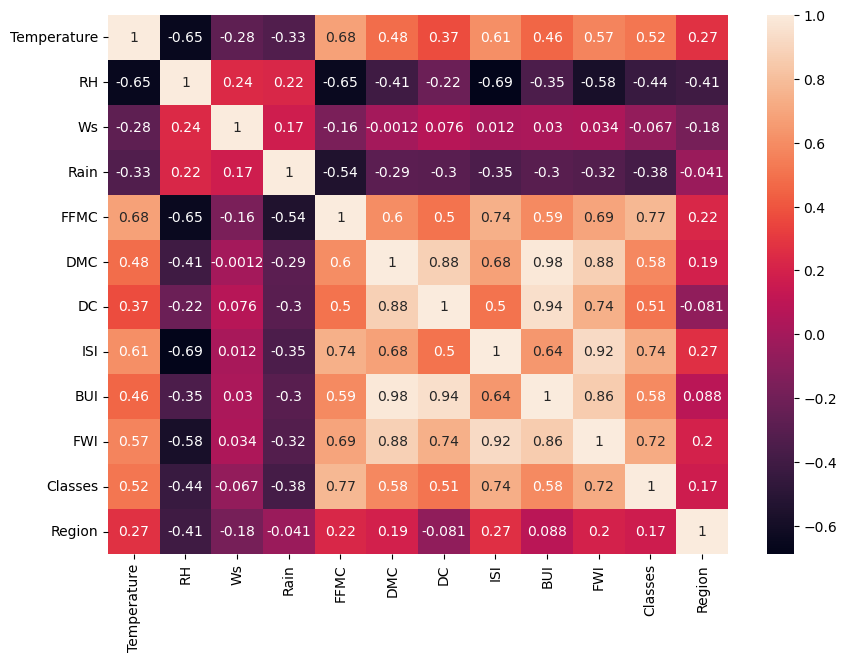

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset_1.corr(),annot=True)

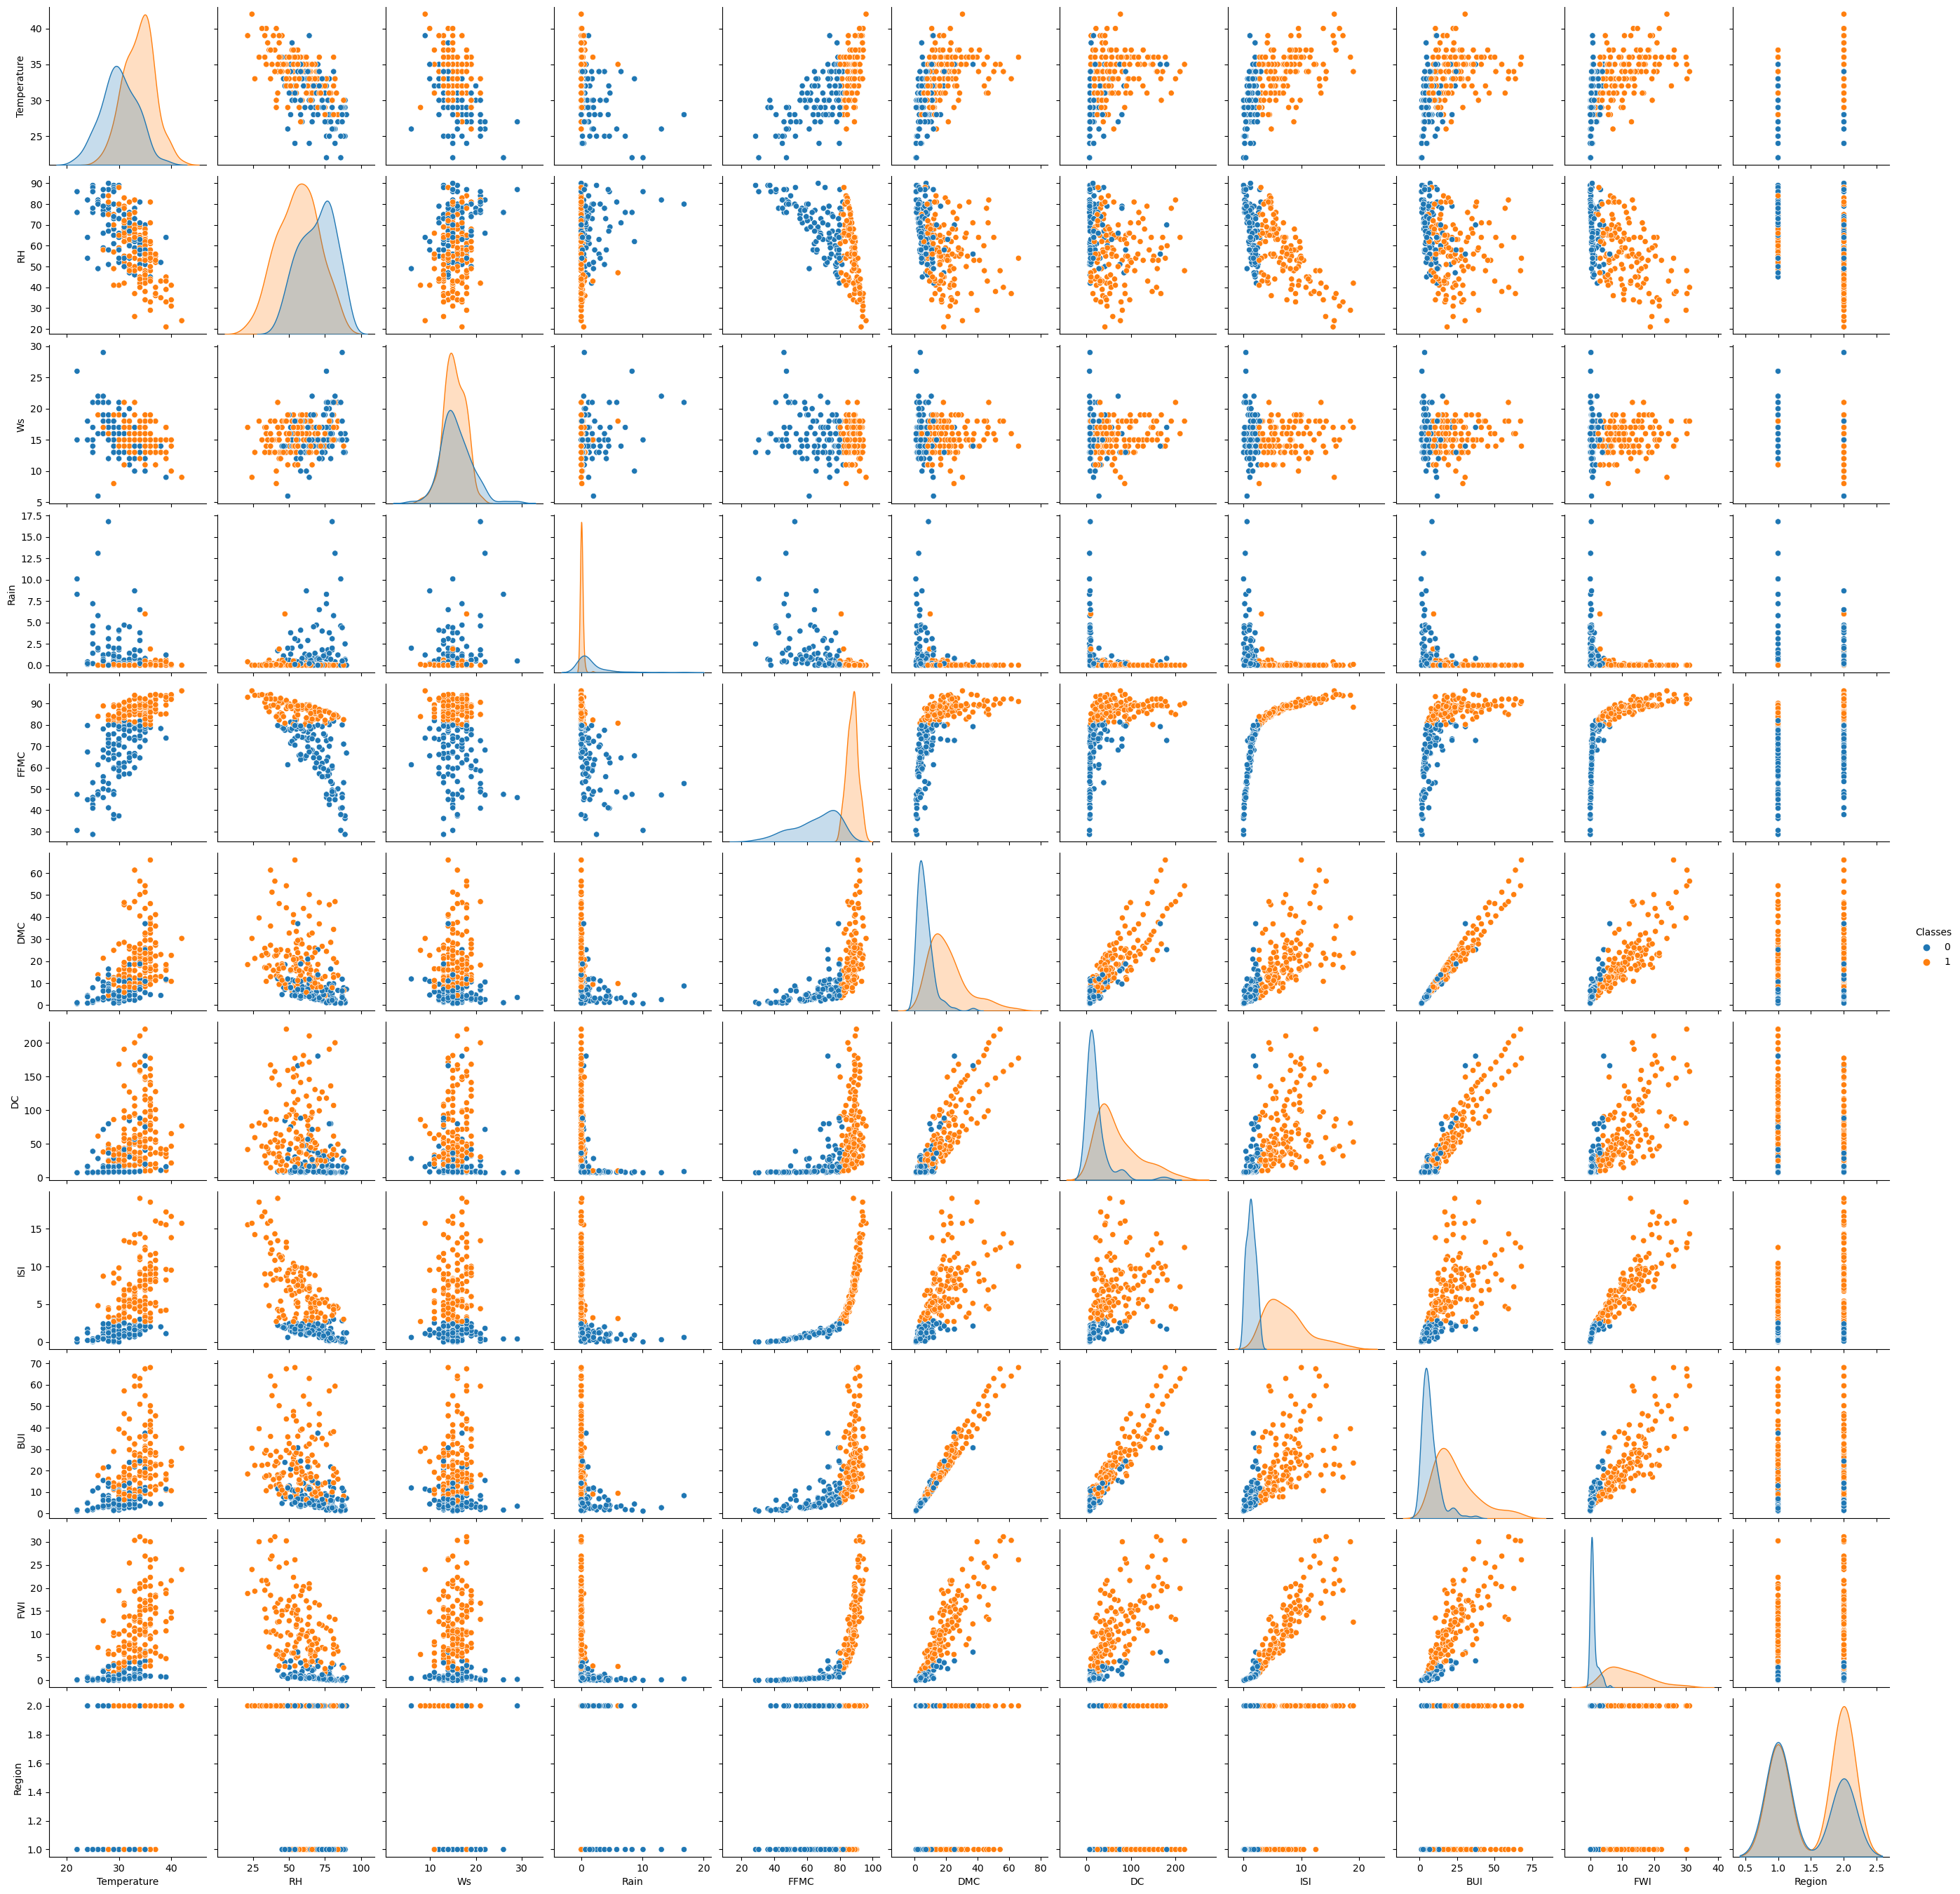

In [15]:
sns.pairplot(dataset_1, hue = 'Classes')

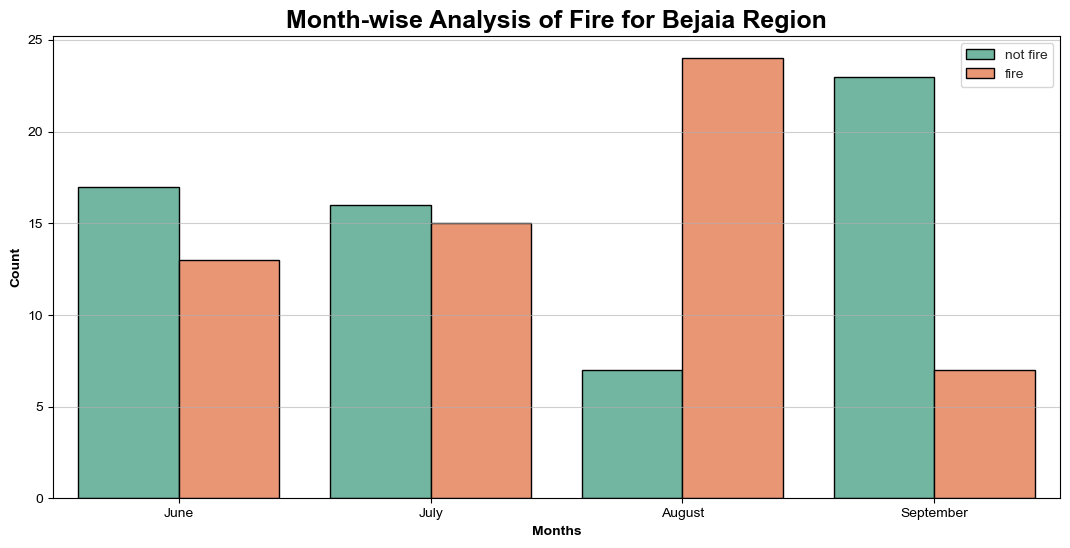

In [16]:
dftemp_1= dataset.loc[dataset['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= dftemp_1,ec = 'black', palette= 'Set2')
plt.title('Month-wise Analysis of Fire for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September'])
plt.grid(alpha = 0.6,axis = 'y')
plt.show()

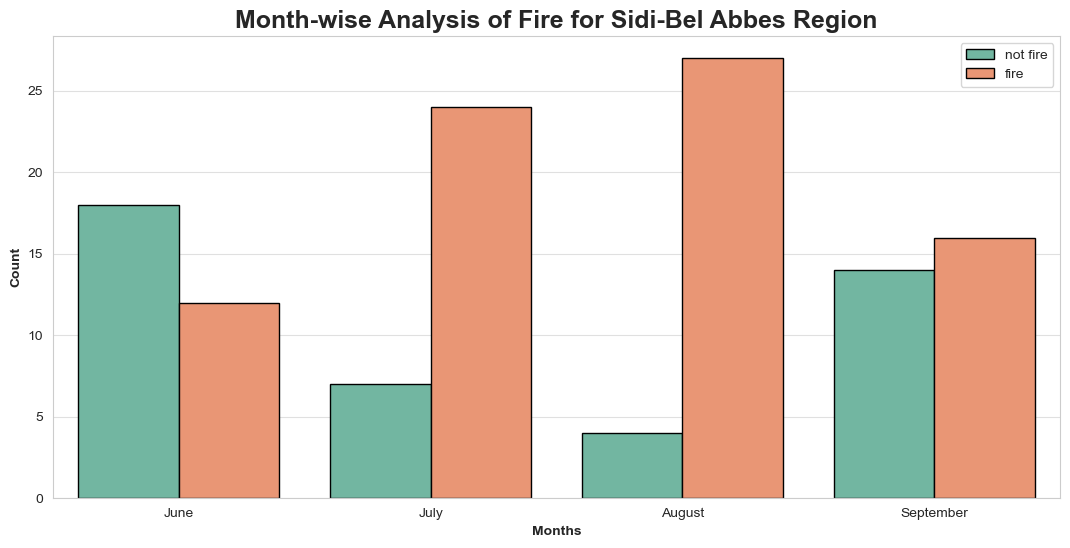

In [17]:
dftemp_2= dataset.loc[dataset['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= dftemp_2 ,ec = 'black', palette= 'Set2')
plt.title('Month-wise Analysis of Fire for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September'])
plt.grid(alpha = 0.6,axis = 'y')
plt.show()

# To check whether the given data is balanced or imbalanced dataset

<Axes: xlabel='Classes', ylabel='count'>

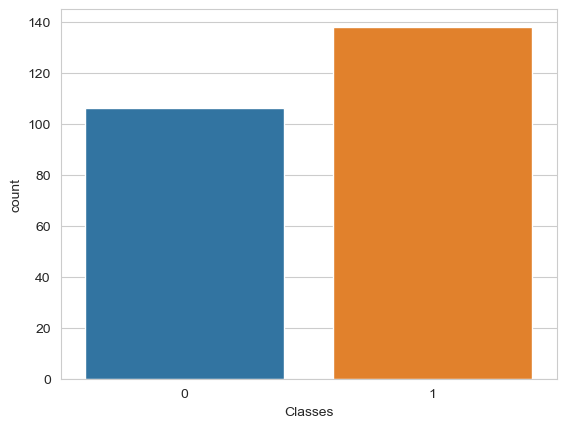

In [18]:
sns.countplot(x='Classes' ,data= dataset_1)

# Report


- The **highest fire** was when the **temprature** of the day was **35 degree C**

- The **highest fire** was when the **wind speed** was **14-15**

- **Most of the fire** was **when** it **did not rain**

- **Relative humidity of 55** has caused a **significantly higher number of fire**

# FWI Components

- **Fine Fuel Moisture Code (FFMC)** index which ranges from **28.6 to 92.5**, the **chance of fire increases** when FFMC **is above 75**


- **Duff Moisture Code (DMC)** index which ranges from **1.1 to 65.9** the chances of **not having fire is from 1.1 to 10** and the increased chances of **having fire is from 10 to 30**


- **Drought Code (DC)** index which ranges from **7 to 220.4**, the chances of **not having fire is when DC ranges from 7 to approximately 25 above which** there is **high chance of fire.**


- **Initial Spread Index (ISI)** index which ranges from **0 to 18.5**, the chances of **not having fire is when ISI ranges from 0 to approximately 3 above which** there is a **high chance of fire.**


- **Buildup Index (BUI)** index which ranges from **1.1 to 68** the chances of **not having fire is when the BUI is from 1.1 to approximately 5 after which** the chances of **having fire rises.**


- **Fire Weather Index (FWI)** Index which ranges from **0 to 31.1**, the chances of **not having fire is from 0 to approximately 3 after which** the **chances of fire rises.**

# Month-wise analysis

**For Bejaia Region:**

- The **proportion of fire** was **significantly high** in the month of **August**

- The **proportion of not having fire** was **significantly higher** in the month of **September**

**For Sidi-Bel Abbes Region:**

- The **proportion of fire** was **significantly high** in the month of **July and August.**

# To see the outliers in data

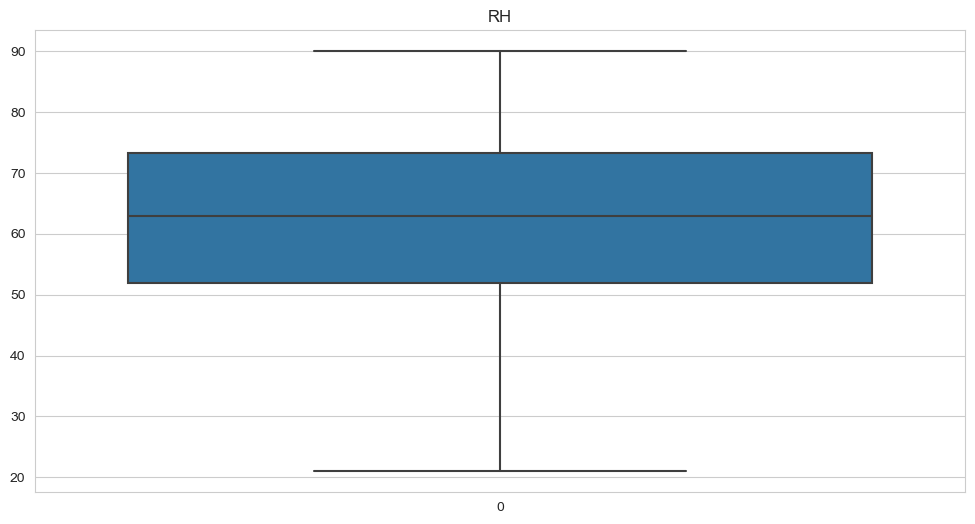

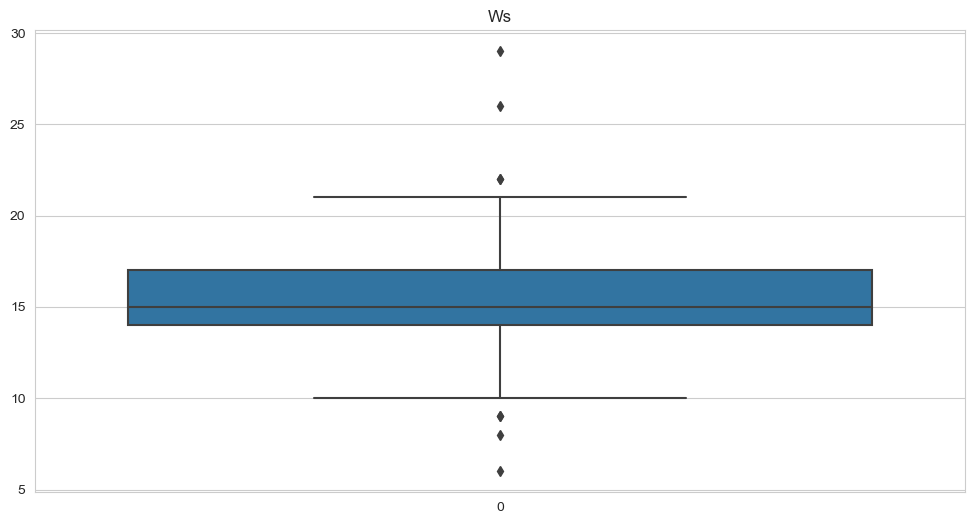

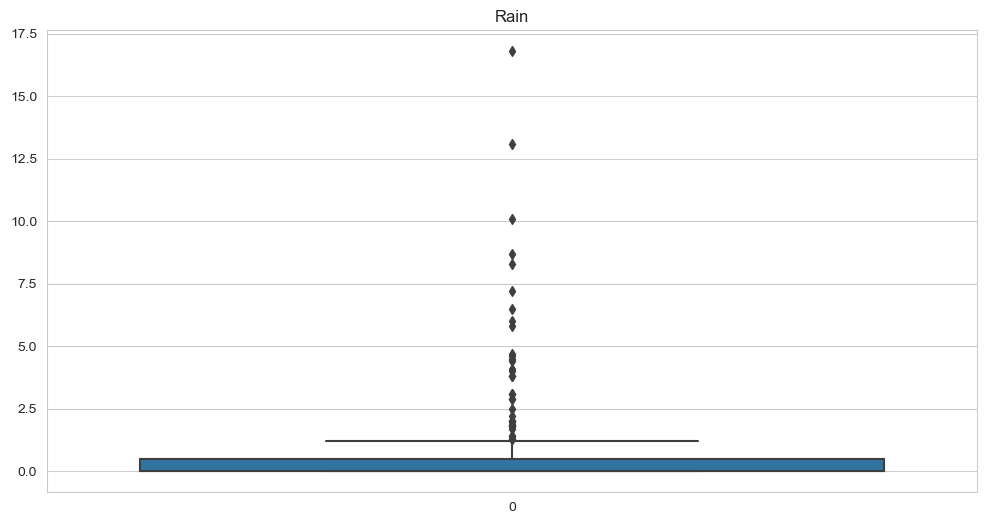

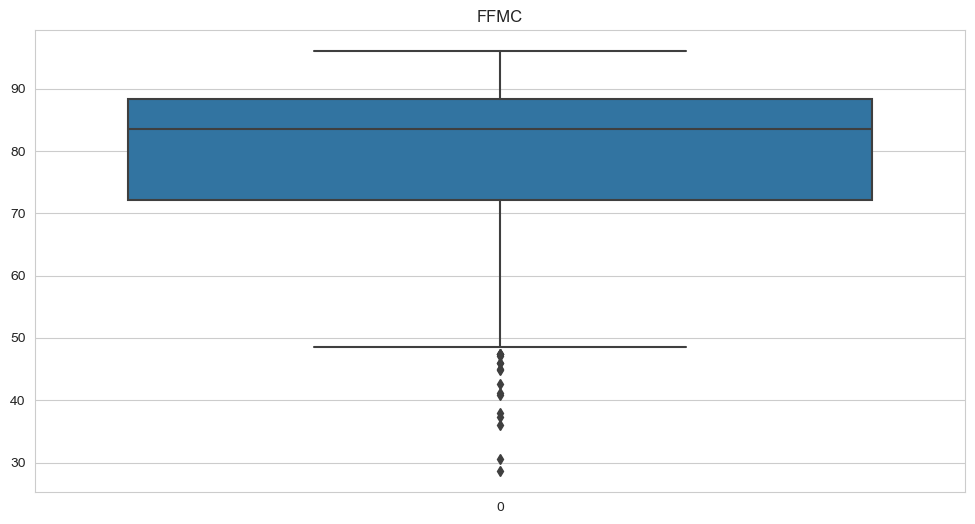

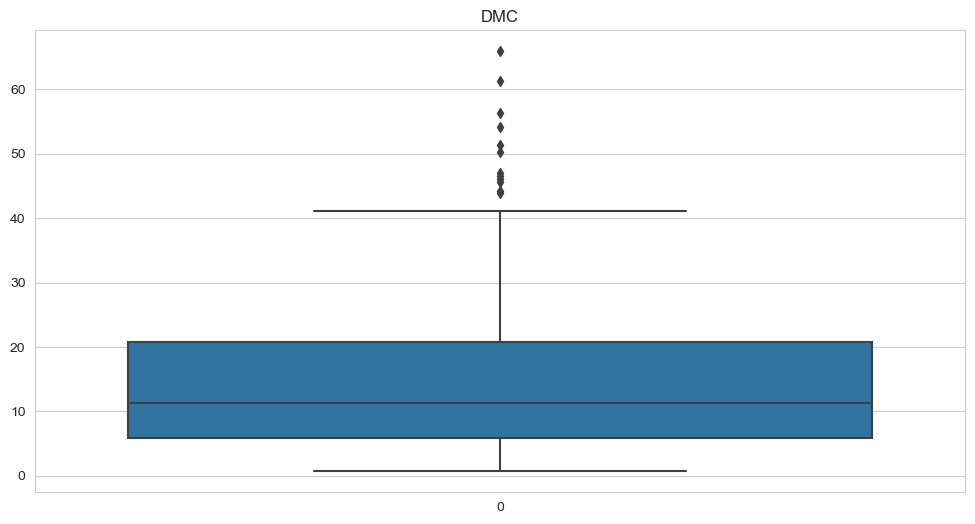

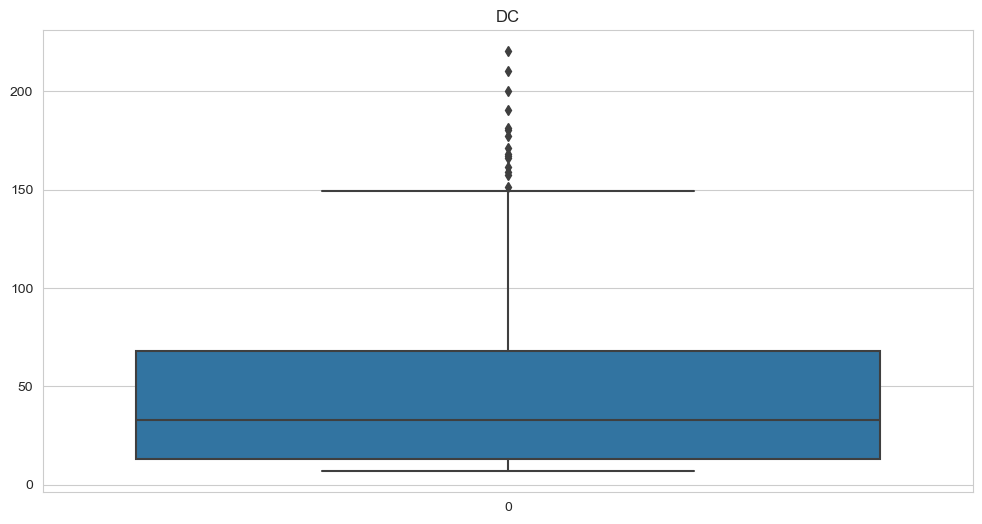

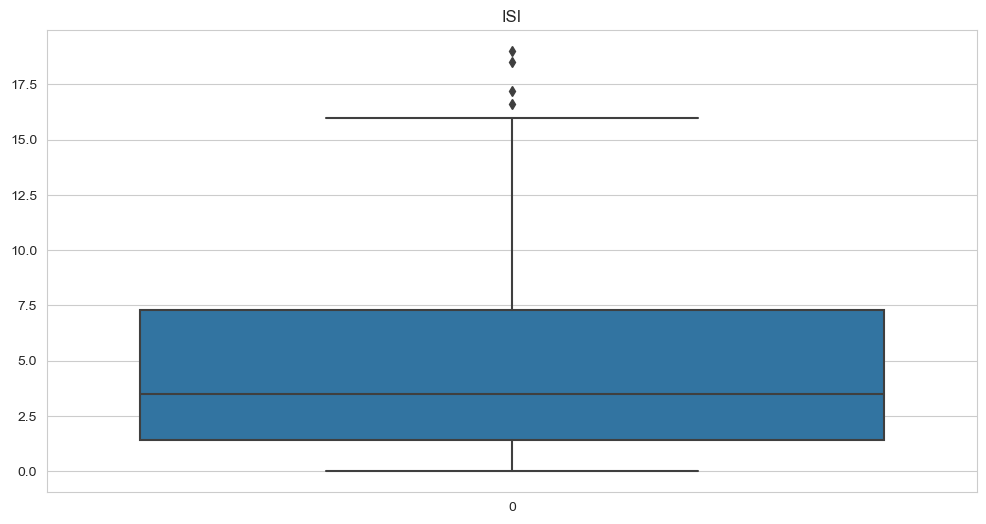

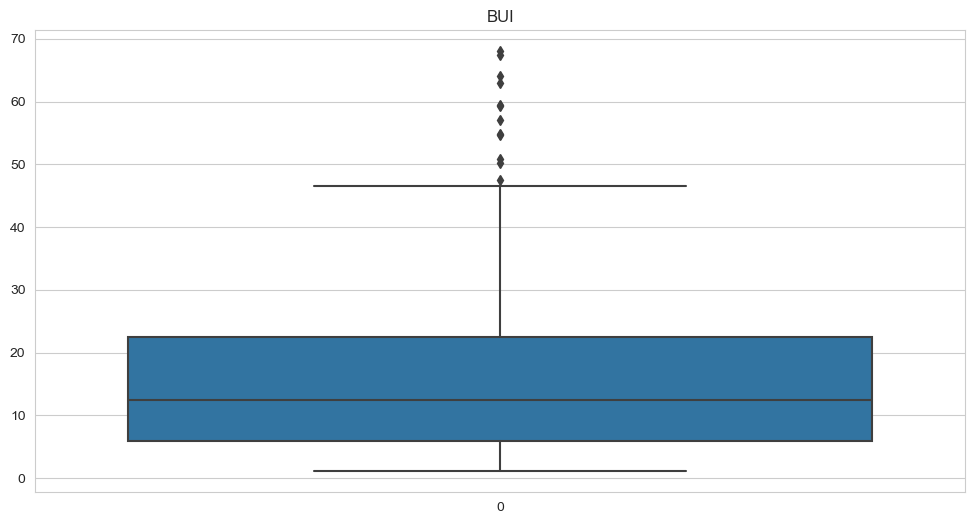

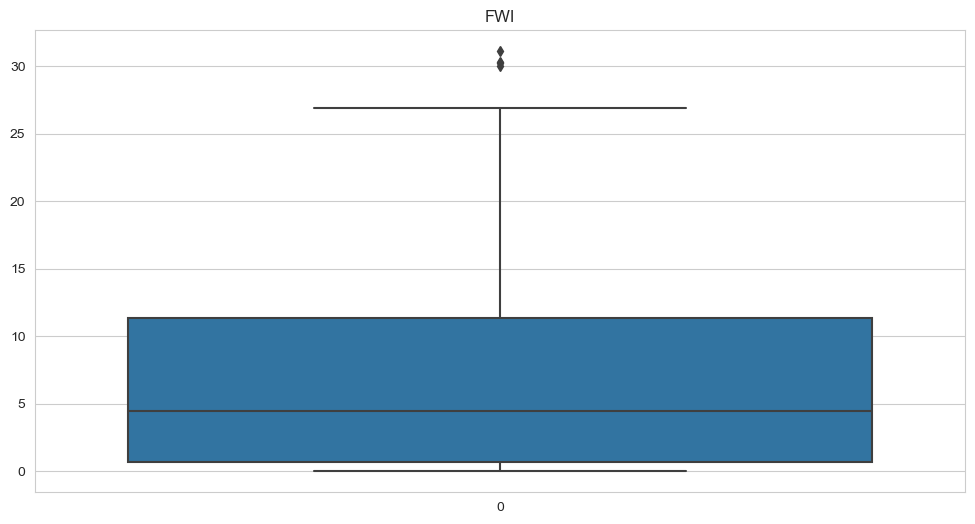

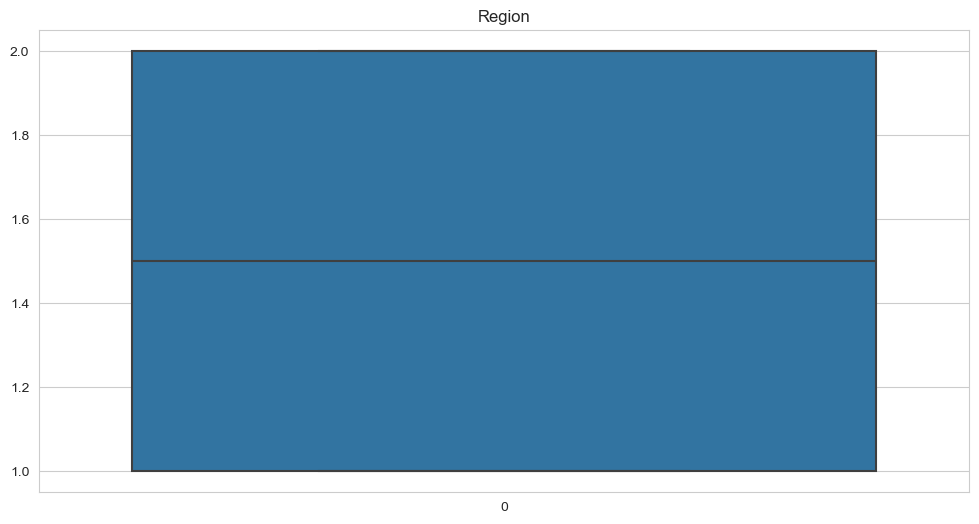

In [19]:
X = dataset_1.drop(columns=['Temperature','Classes'],axis=1)
X.columns
for col in X.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(X[col])
    plt.title(col)
    

# To see the distribution of data

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

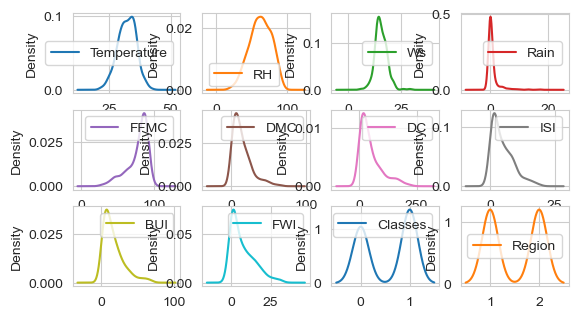

In [20]:
dataset_1.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)

# To check if the data has a normal distribution after log transformation

In [21]:
def plots(dataset_1,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.distplot(dataset_1[var])
    plt.title('before' + str(t))
    plt.subplot(122)
    sns.distplot(t)
    plt.title('After' + str(t))

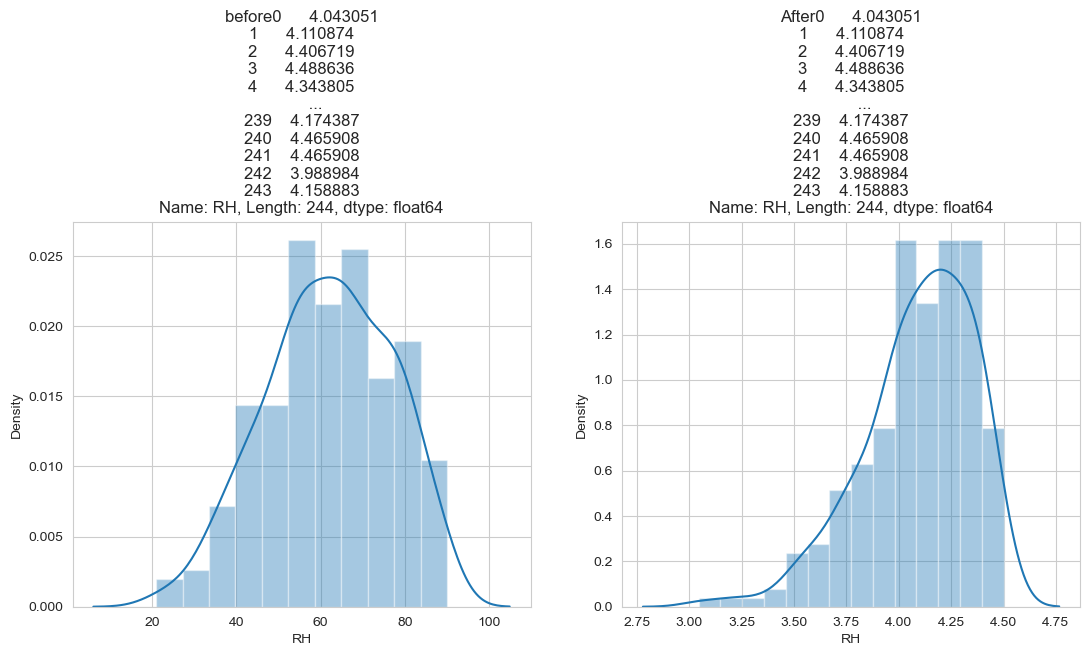

In [22]:
plots(dataset_1,'RH',np.log(dataset_1['RH']))

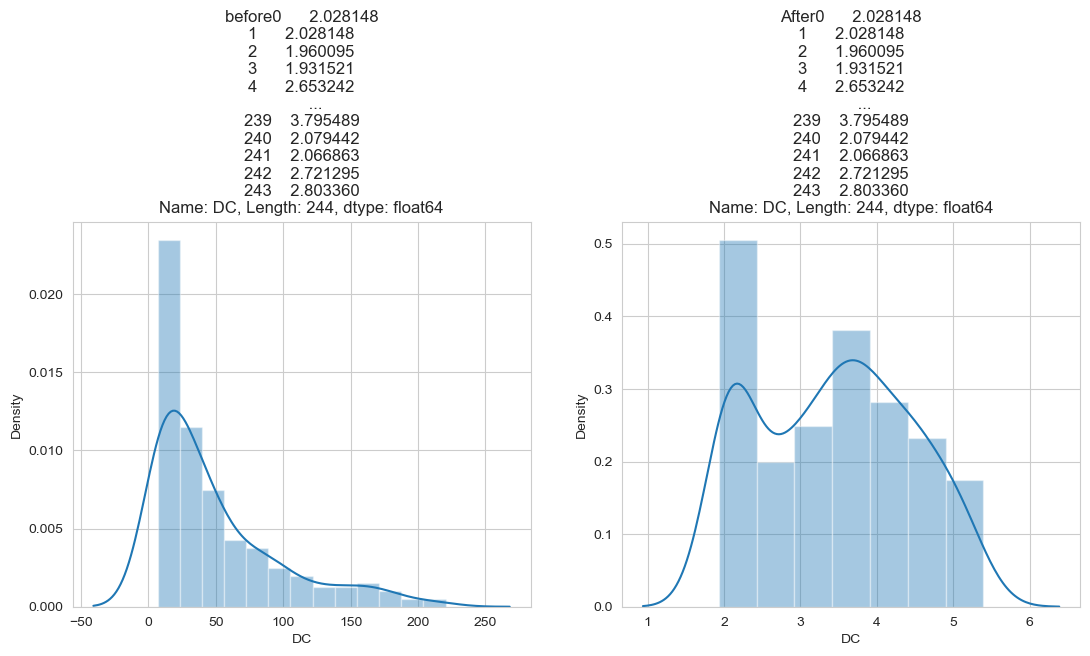

In [23]:
plots(dataset_1,'DC',np.log(dataset_1['DC']))

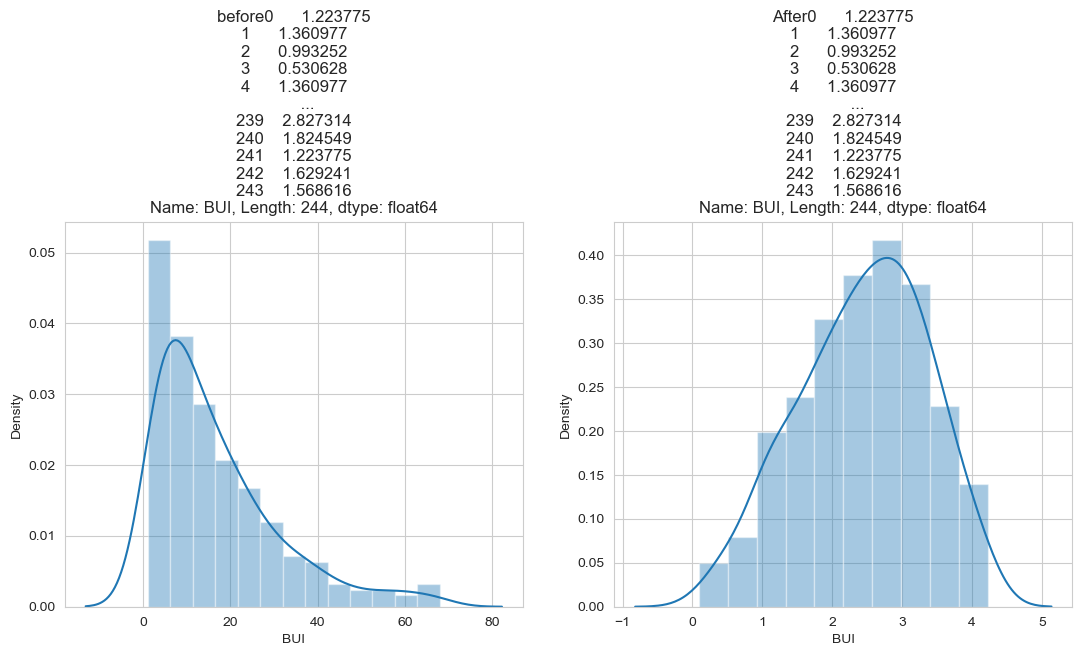

In [24]:
plots(dataset_1,'BUI',np.log(dataset_1['BUI']))

In [25]:
X = dataset_1.drop(columns=['Temperature'],axis=1)
y = dataset_1['Temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=2)

# To check if there is difference in data with the help of Q-Q plot

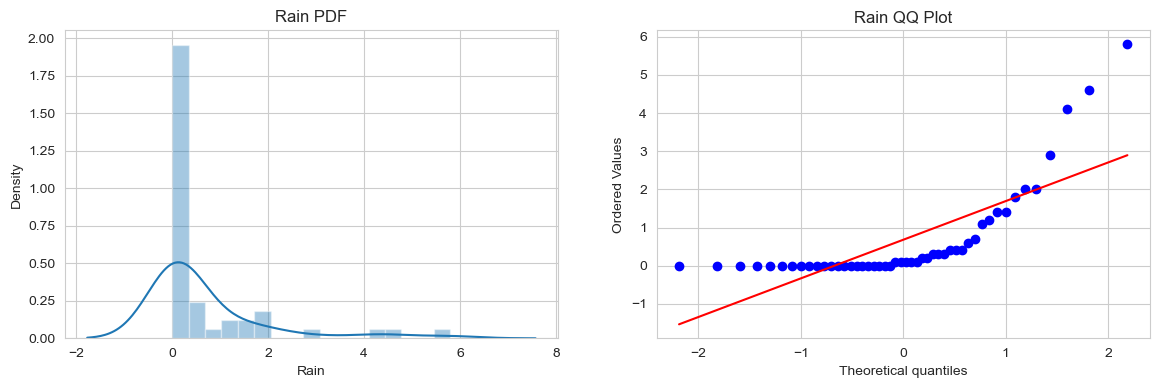

In [26]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Rain'])
plt.title('Rain PDF')

plt.subplot(122)
stats.probplot(X_train['Rain'], dist="norm", plot=plt)
plt.title('Rain QQ Plot')

plt.show()

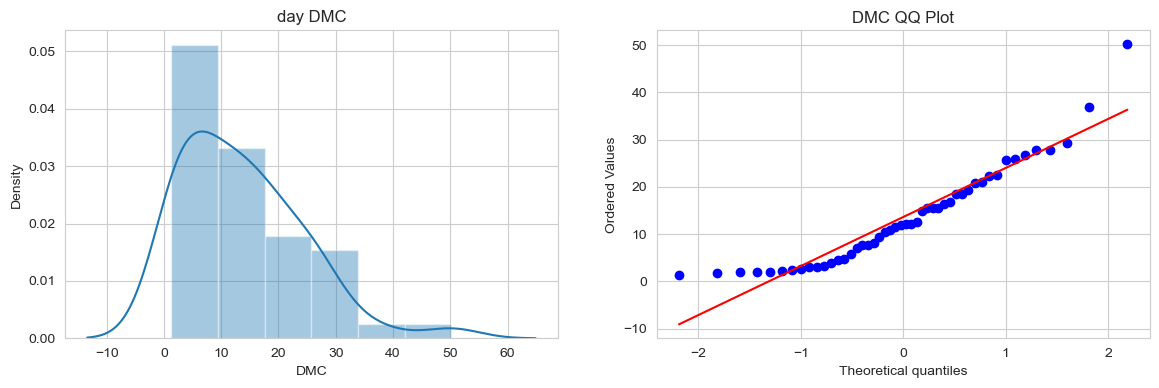

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['DMC'])
plt.title('day DMC')

plt.subplot(122)
stats.probplot(X_train['DMC'], dist="norm", plot=plt)
plt.title('DMC QQ Plot')

plt.show()

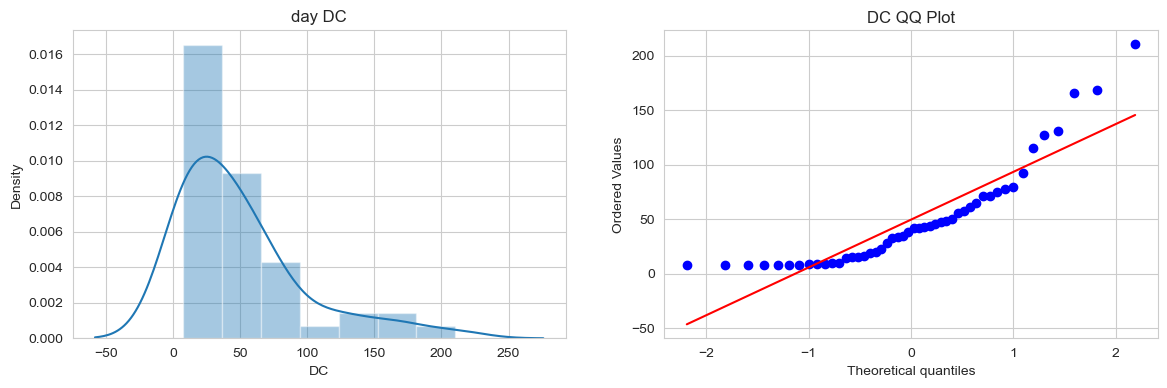

In [28]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['DC'])
plt.title('day DC')

plt.subplot(122)
stats.probplot(X_train['DC'], dist="norm", plot=plt)
plt.title('DC QQ Plot')

plt.show()

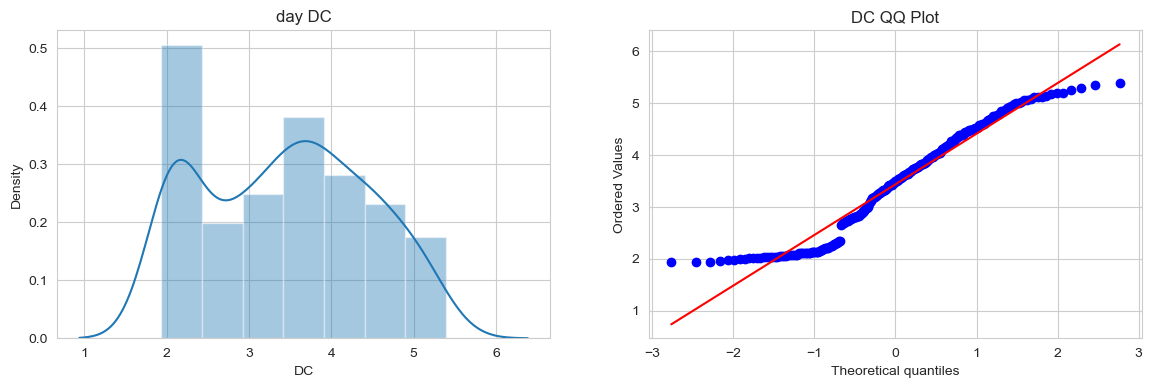

In [29]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(np.log(dataset_1['DC']))
plt.title('day DC')

plt.subplot(122)
stats.probplot(np.log(dataset_1['DC']), dist="norm", plot=plt)
plt.title('DC QQ Plot')

plt.show()

# Checking if power transformation will help normalize data

In [30]:
def plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before' + str(t))
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('After' + str(t))

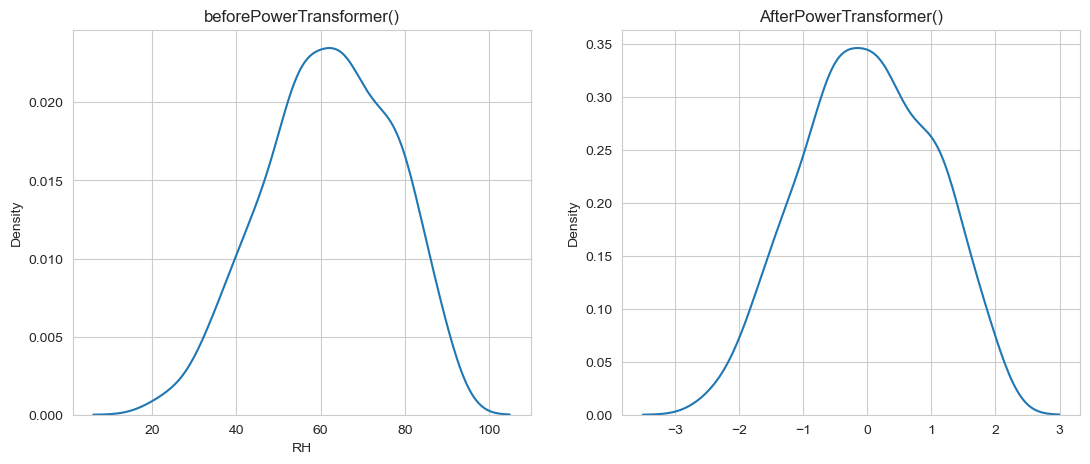

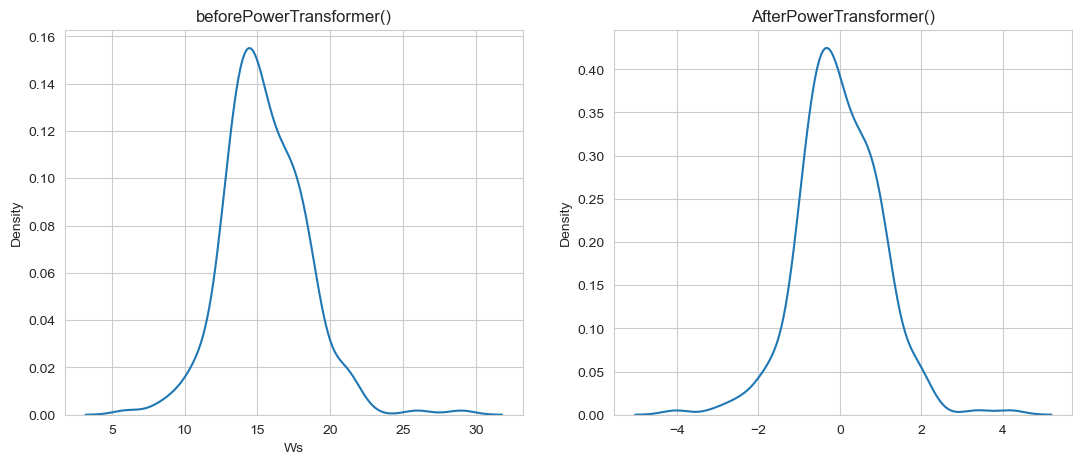

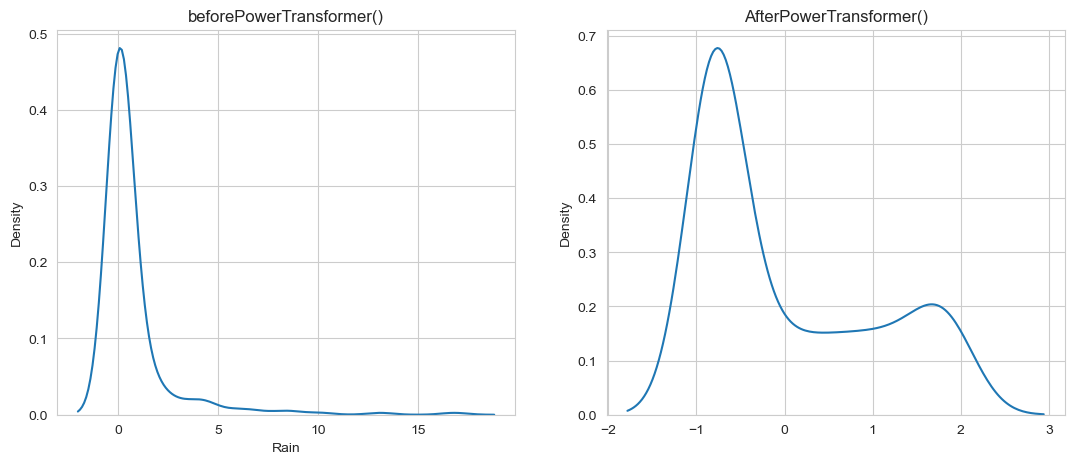

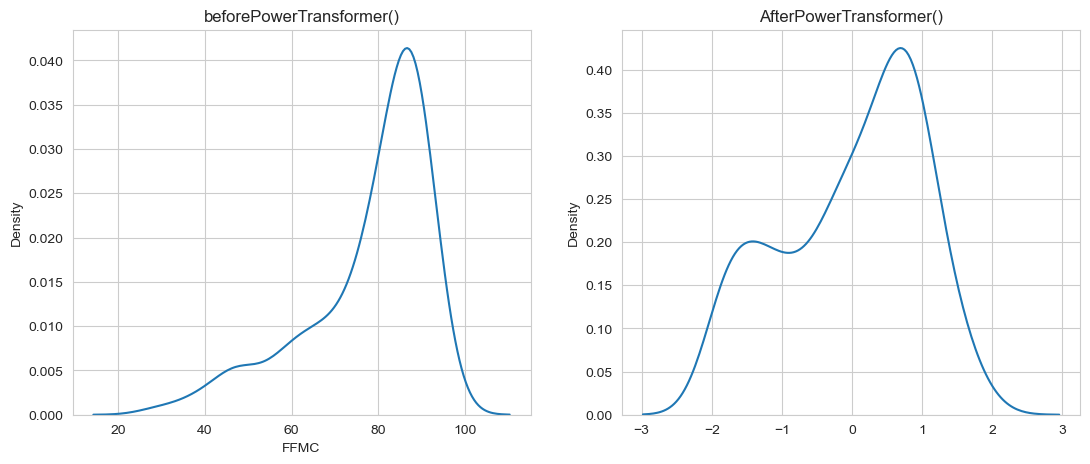

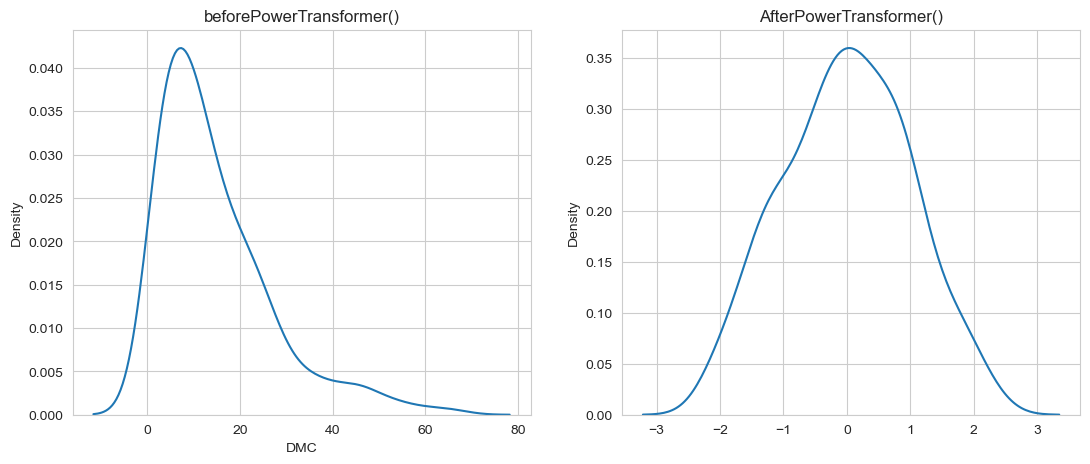

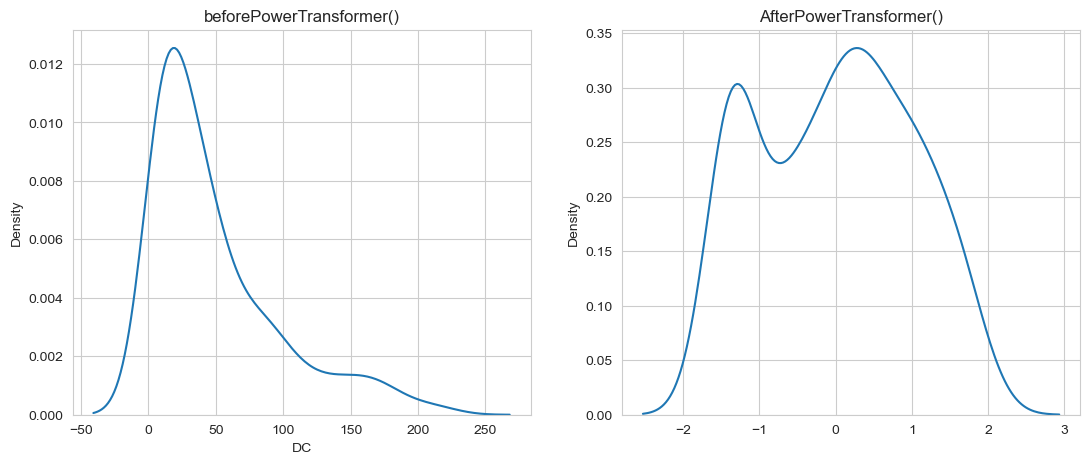

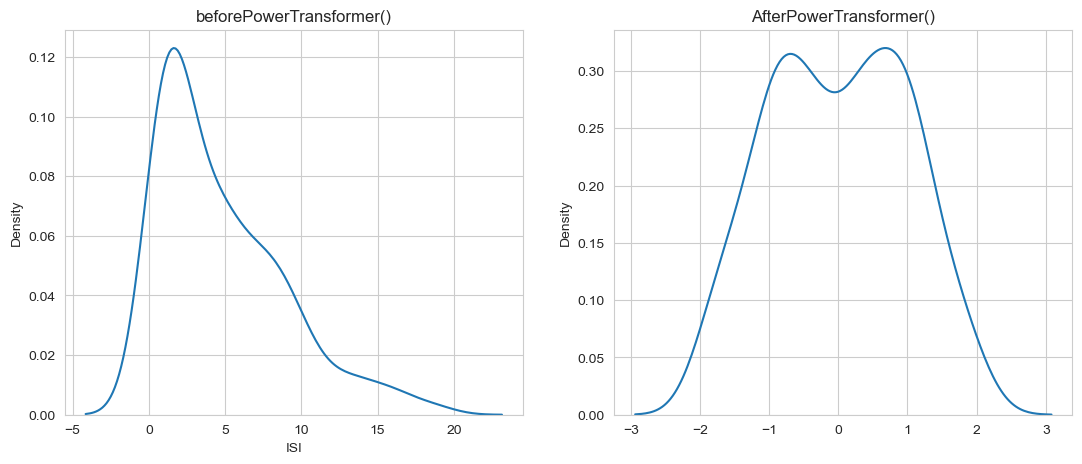

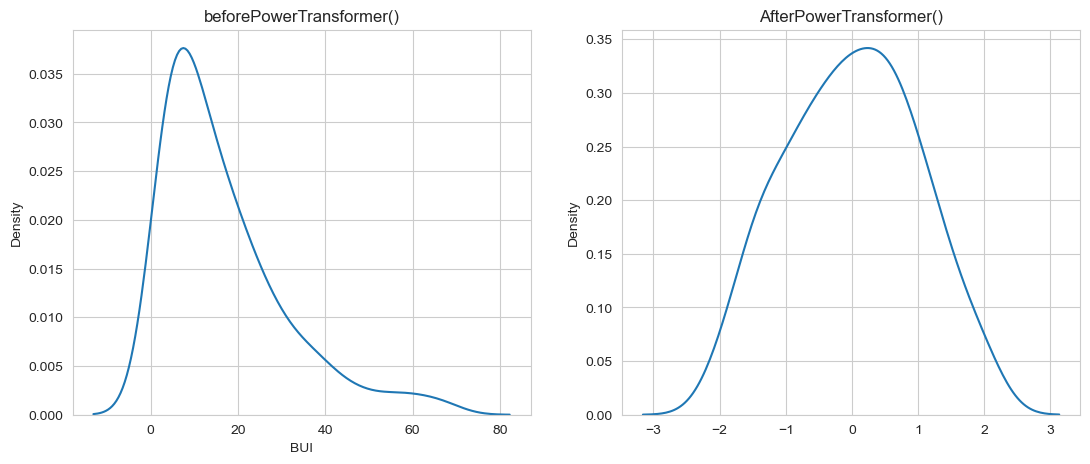

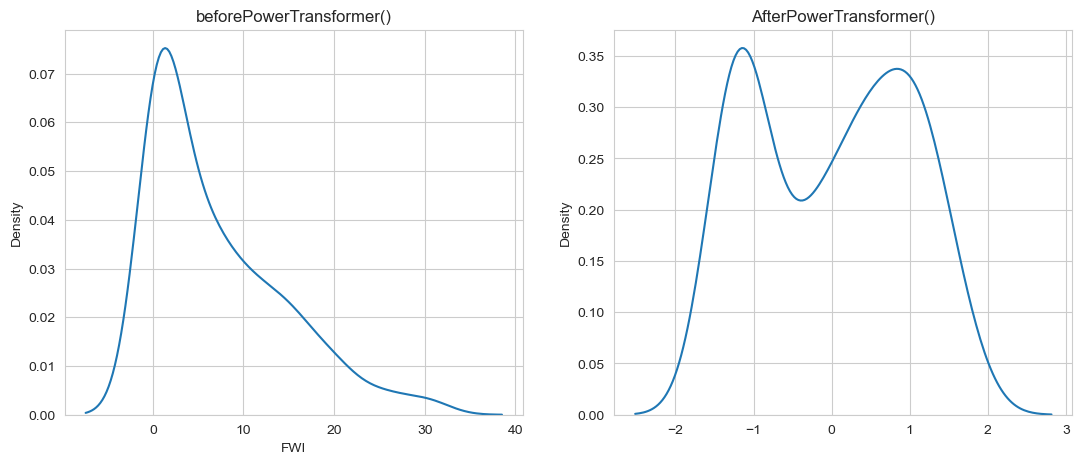

In [31]:
## Applying Yeo johnson as our datasets has some 0 values also
for col in [ 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']:
    plots(X,col,PowerTransformer())

Observation : After applying Power Transform distplots did not change

# After applying Power Transform distplots did not change much infact log transformation is giving us better results

In [32]:
for c in [ 'RH', 'Ws', 'FFMC','DMC', 'DC', 'BUI']:
    dataset_1[c] = np.log10(dataset_1[c]+1)

In [33]:
dataset_1

Temperature        RH        Ws  Rain      FFMC       DMC        DC  ISI  \
0             29  1.763428  1.278754   0.0  1.824126  0.643453  0.934498  1.3   
1             29  1.792392  1.146128   1.3  1.815578  0.707570  0.934498  1.0   
2             26  1.919078  1.361728  13.1  1.682145  0.544068  0.908485  0.3   
3             25  1.954243  1.146128   2.5  1.471292  0.361728  0.897627  0.0   
4             27  1.892095  1.230449   0.0  1.818226  0.602060  1.181844  1.2   
..           ...       ...       ...   ...       ...       ...       ...  ...   
239           30  1.819544  1.176091   0.0  1.936514  1.230449  1.658011  4.5   
240           28  1.944483  1.204120   4.4  1.624282  0.875061  0.954243  0.1   
241           27  1.944483  1.477121   0.5  1.671173  0.653213  0.949390  0.4   
242           24  1.740363  1.278754   0.1  1.906874  0.724276  1.209515  1.7   
243           24  1.812913  1.204120   0.2  1.834421  0.681241  1.243038  1.2   

          BUI  FWI  Classes  Region  
0    0.643453  0.5        0       1  
1    0.690196  0.4        0       1  
2    0.568202  0.1        0       1  
3    0.431364  0.0        0       1  
4    0.690196  0.5        0       1  
..        ...  ...      ...     ...  
239  1.252853  6.5        1       2  
240  0.857332  0.0        0       2  
241  0.643453  0.2        0       2  
242  0.785330  0.7        0       2  
243  0.763428  0.5        0       2  

[244 rows x 12 columns]

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

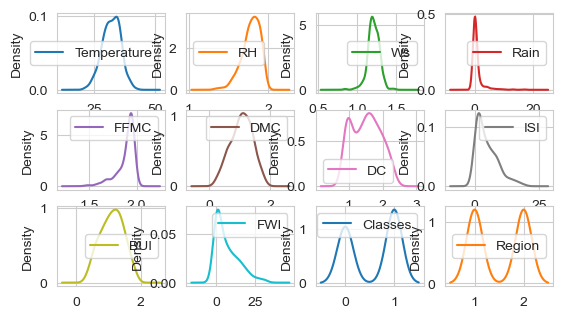

In [34]:
dataset_1.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)

In [35]:
dataset_1.to_csv('Algerian_forest_fires_dataset_CLEANEDandEDAdone.csv', index=False)

# Detecting outliers and creating a upper limit and lower limit and converting the points to beyond limits to either upper limit or lower limit

In [36]:
def detect_outliers_IQR(col):
    # Finding the IQR
    percentile25 = dataset_1[col].quantile(0.25)
    percentile75 = dataset_1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    dataset_1[col] = np.where(dataset_1[col]>upper_limit, upper_limit, np.where(dataset_1[col]<lower_limit,lower_limit,dataset_1[col]))
    return dataset_1[dataset_1[col] > upper_limit]
    return dataset_1[dataset_1[col] < lower_limit]

In [37]:
detect_outliers_IQR('FWI')

percentile25 0.7
percentile75 11.375
Upper limit 27.387500000000003
Lower limit -15.312500000000004


Empty DataFrame
Columns: [Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

In [38]:
dataset_1

Temperature        RH        Ws  Rain      FFMC       DMC        DC  ISI  \
0             29  1.763428  1.278754   0.0  1.824126  0.643453  0.934498  1.3   
1             29  1.792392  1.146128   1.3  1.815578  0.707570  0.934498  1.0   
2             26  1.919078  1.361728  13.1  1.682145  0.544068  0.908485  0.3   
3             25  1.954243  1.146128   2.5  1.471292  0.361728  0.897627  0.0   
4             27  1.892095  1.230449   0.0  1.818226  0.602060  1.181844  1.2   
..           ...       ...       ...   ...       ...       ...       ...  ...   
239           30  1.819544  1.176091   0.0  1.936514  1.230449  1.658011  4.5   
240           28  1.944483  1.204120   4.4  1.624282  0.875061  0.954243  0.1   
241           27  1.944483  1.477121   0.5  1.671173  0.653213  0.949390  0.4   
242           24  1.740363  1.278754   0.1  1.906874  0.724276  1.209515  1.7   
243           24  1.812913  1.204120   0.2  1.834421  0.681241  1.243038  1.2   

          BUI  FWI  Classes  Region  
0    0.643453  0.5        0       1  
1    0.690196  0.4        0       1  
2    0.568202  0.1        0       1  
3    0.431364  0.0        0       1  
4    0.690196  0.5        0       1  
..        ...  ...      ...     ...  
239  1.252853  6.5        1       2  
240  0.857332  0.0        0       2  
241  0.643453  0.2        0       2  
242  0.785330  0.7        0       2  
243  0.763428  0.5        0       2  

[244 rows x 12 columns]

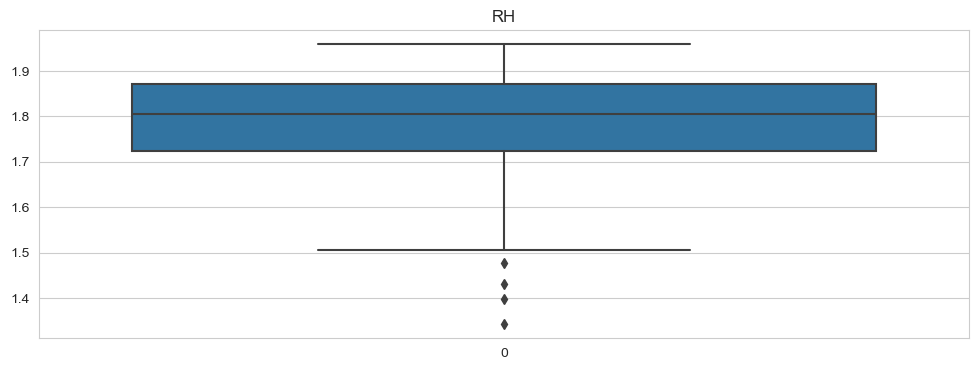

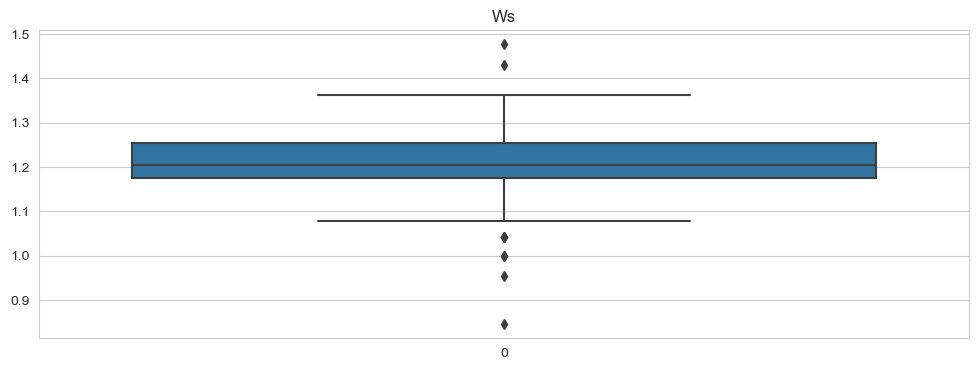

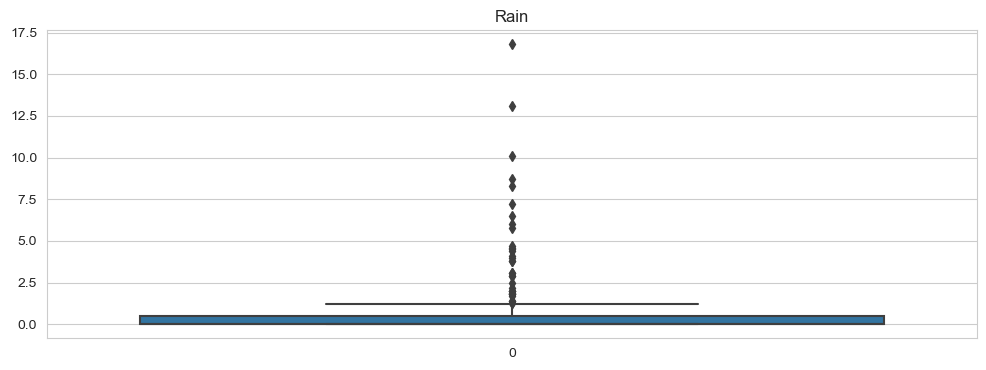

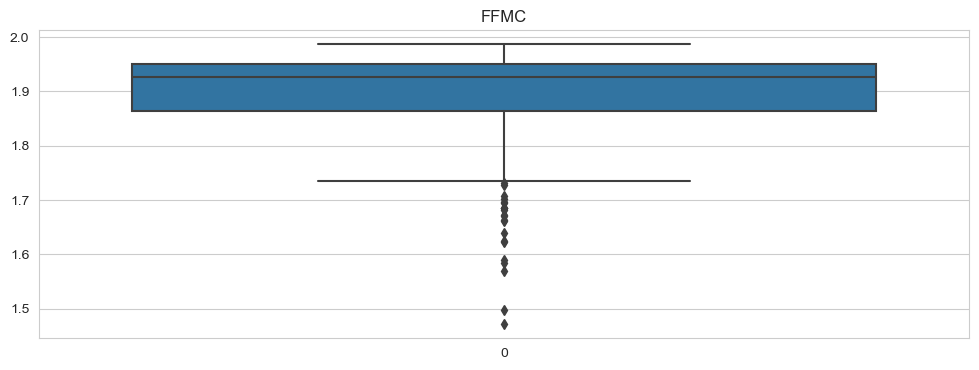

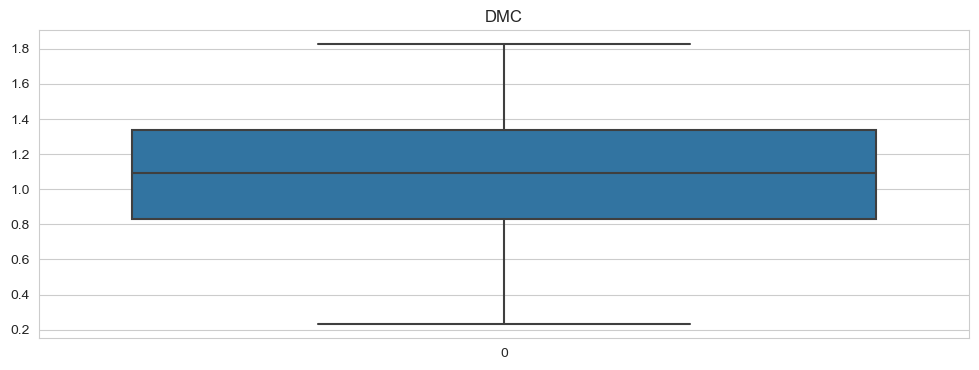

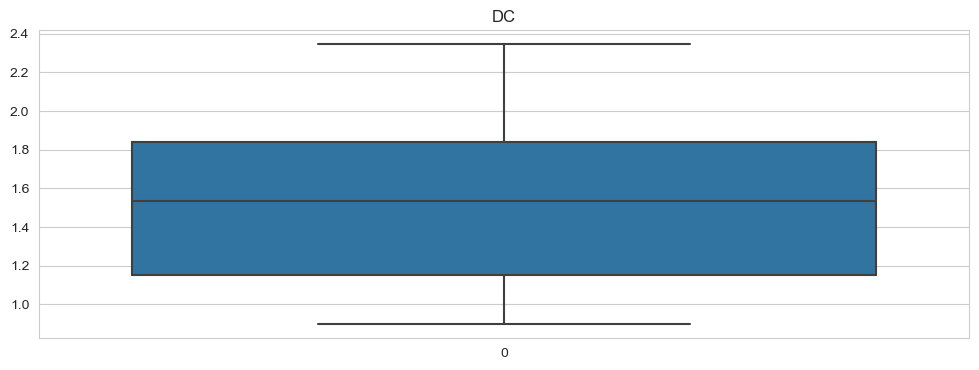

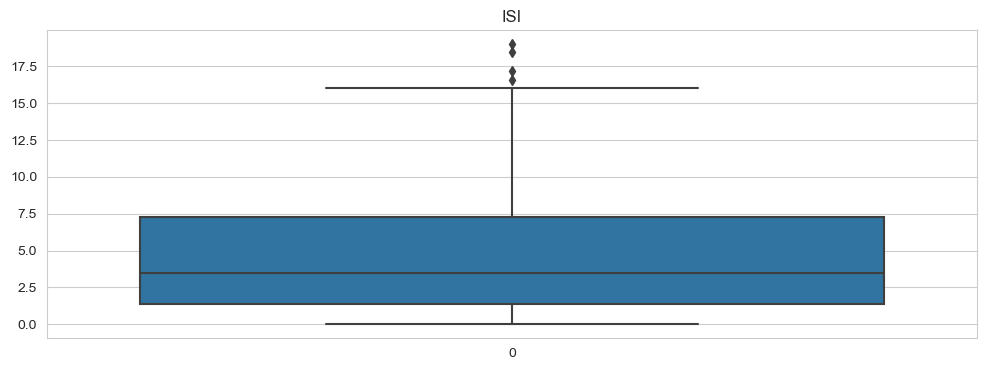

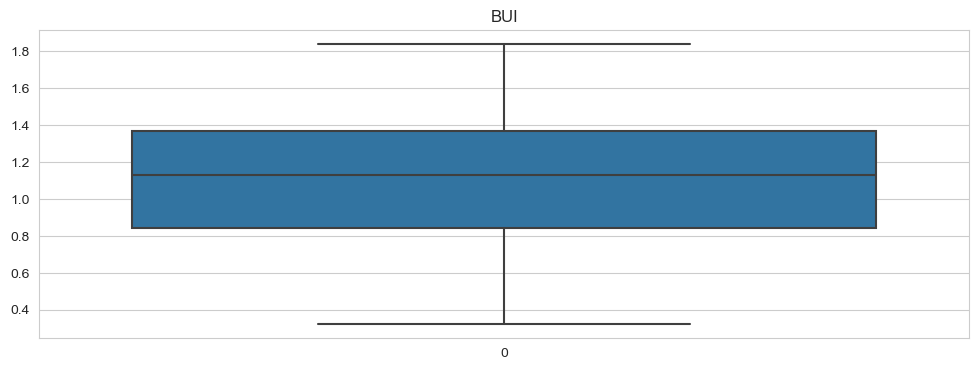

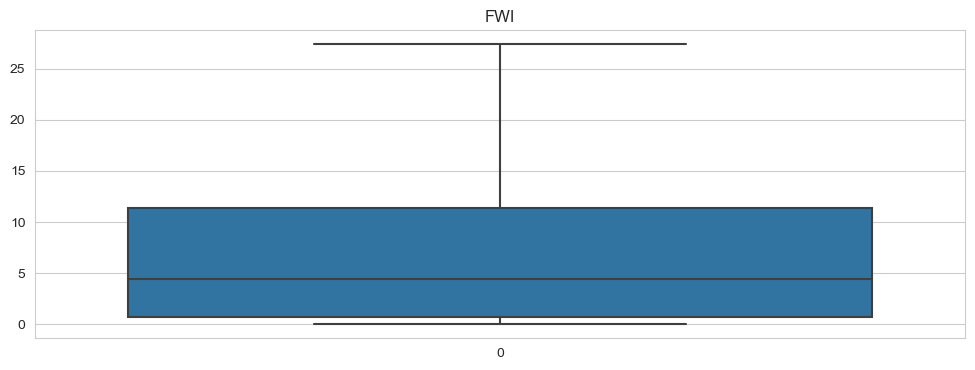

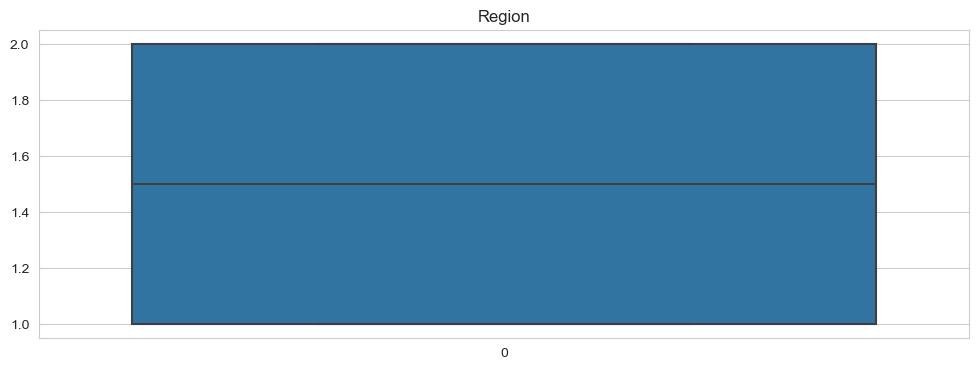

In [39]:
X = dataset_1.drop(columns=['Temperature','Classes'],axis=1)
X.columns
for col in X.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(X[col])
    plt.title(col)

In [40]:
detect_outliers_IQR('RH')

percentile25 1.724275869600789
percentile75 1.8706891056461572
Upper limit 2.0903089597142097
Lower limit 1.5046560155327366


Empty DataFrame
Columns: [Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

In [41]:
detect_outliers_IQR('Ws')

percentile25 1.1760912590556813
percentile75 1.255272505103306
Upper limit 1.374044374174743
Lower limit 1.0573193899842444


Empty DataFrame
Columns: [Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

In [42]:
detect_outliers_IQR('Rain')

percentile25 0.0
percentile75 0.5
Upper limit 1.25
Lower limit -0.75


Empty DataFrame
Columns: [Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

In [43]:
detect_outliers_IQR('FFMC')

percentile25 1.8637626225301327
percentile75 1.9508514588885464
Upper limit 2.0814847134261667
Lower limit 1.7331293679925122


Empty DataFrame
Columns: [Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

In [44]:
detect_outliers_IQR('ISI')

percentile25 1.4
percentile75 7.3
Upper limit 16.150000000000002
Lower limit -7.450000000000001


Empty DataFrame
Columns: [Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

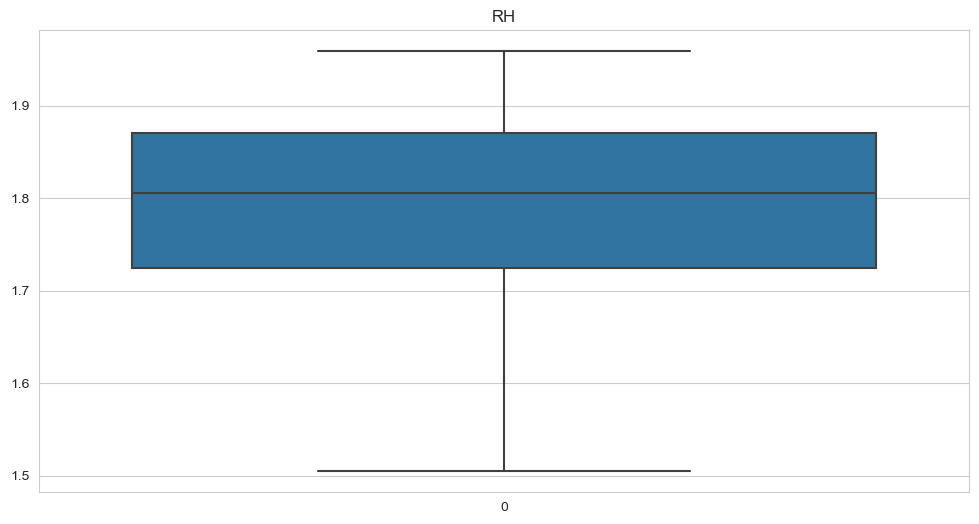

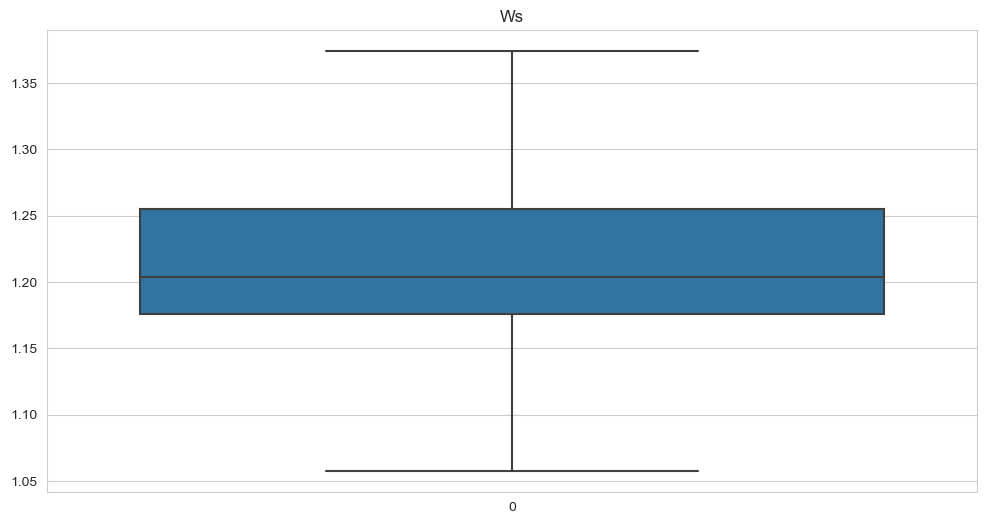

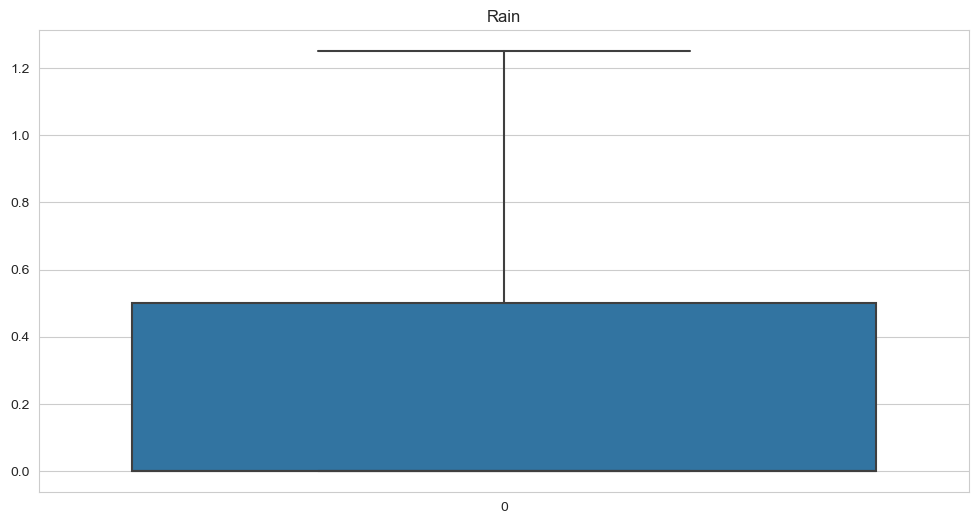

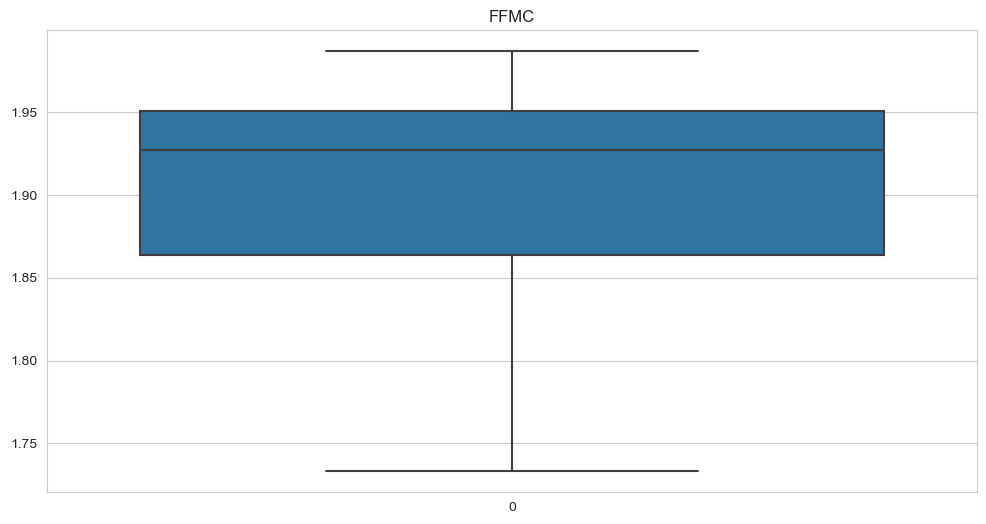

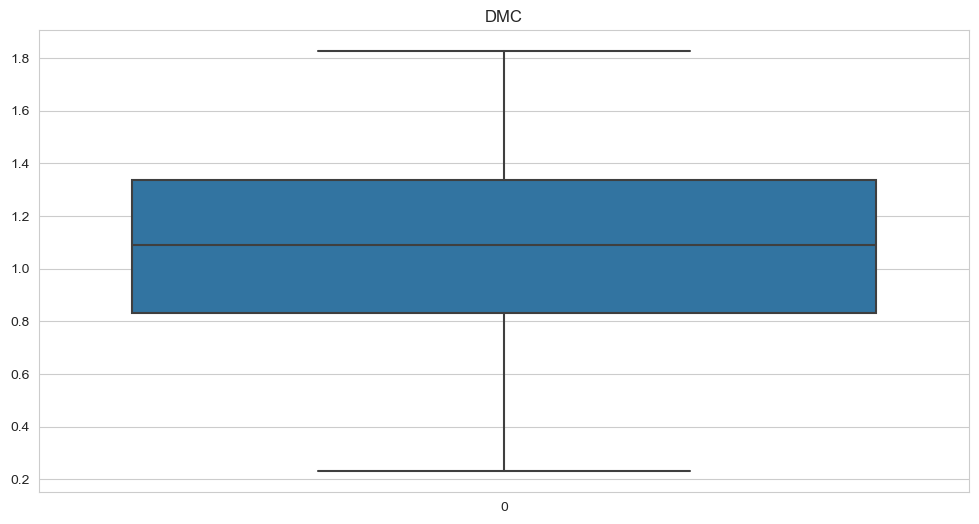

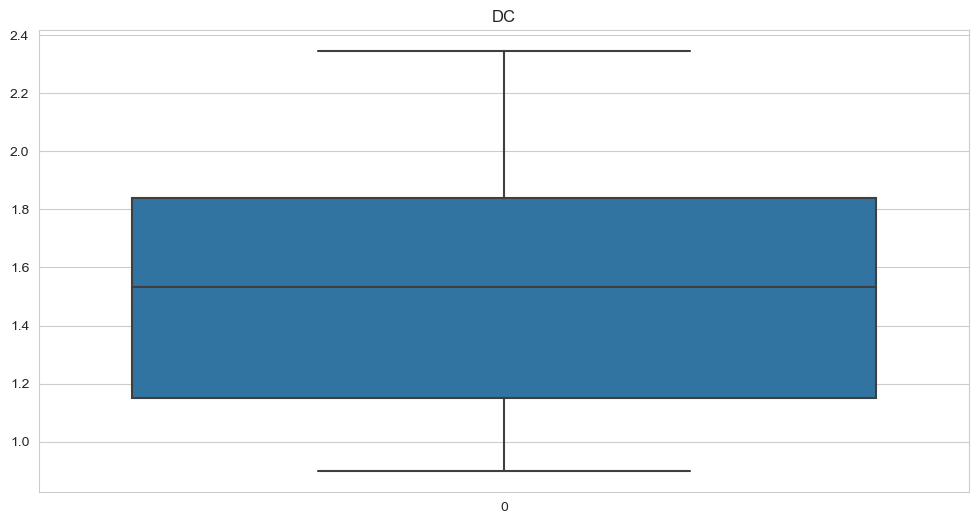

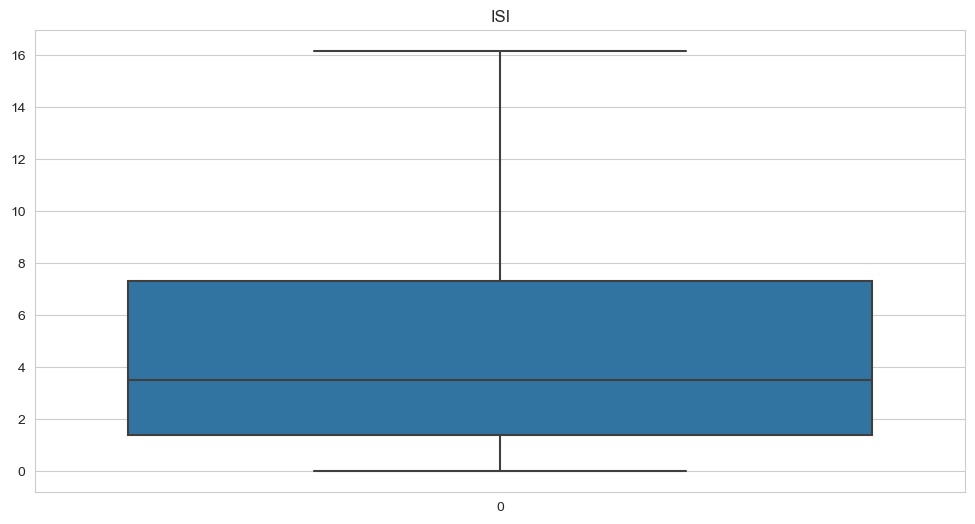

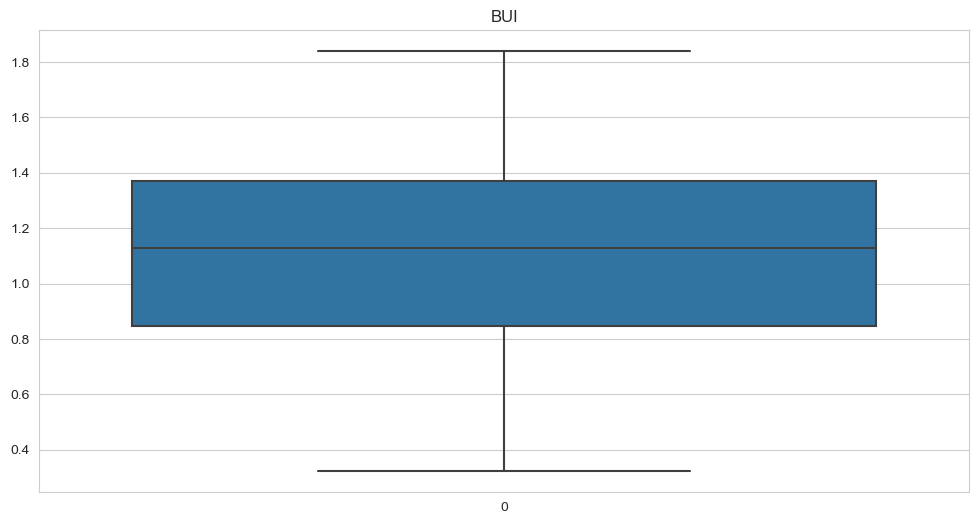

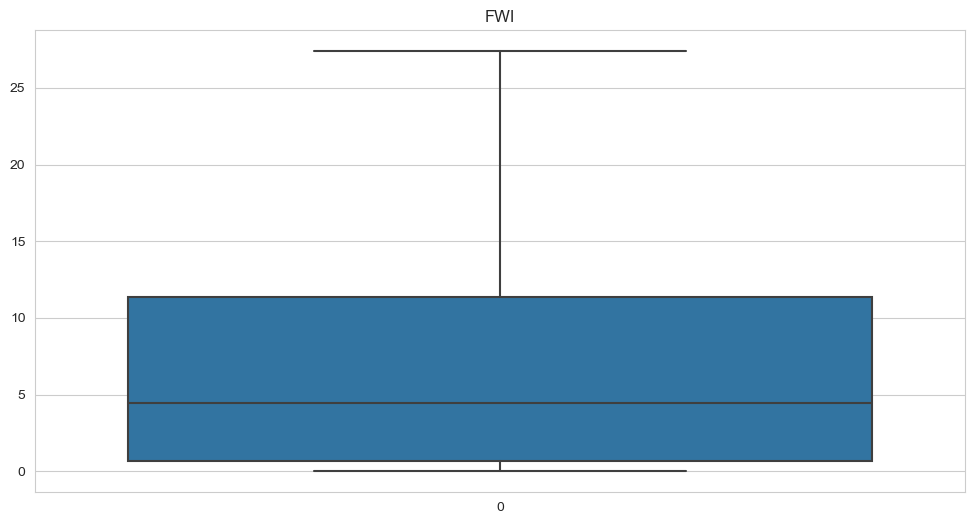

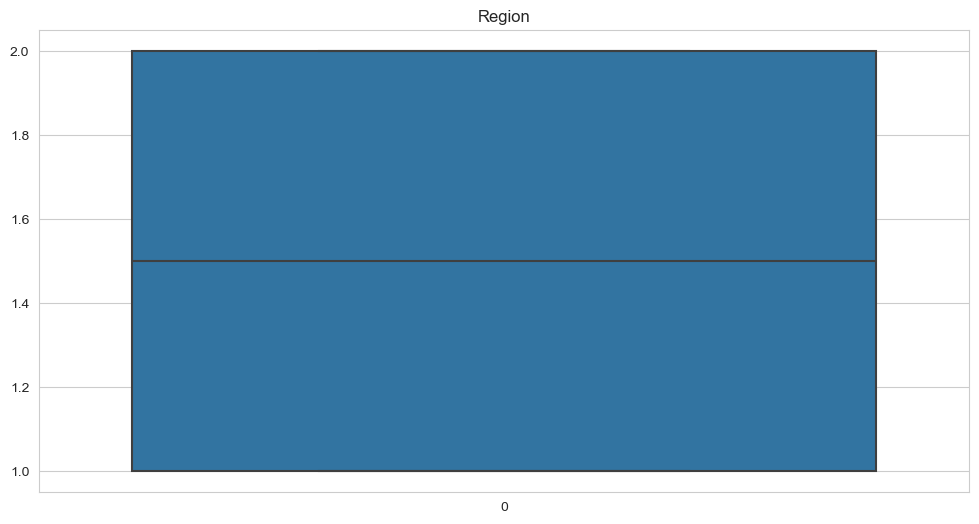

In [45]:
X = dataset_1.drop(columns=['Temperature','Classes'],axis=1)
X.columns
for col in X.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(X[col])
    plt.title(col)

In [46]:
dataset_1.to_csv('Algerian_forest_fires_dataset_CLEANEDandEDAandoutlierremoved.csv', index=False)